## PREDICTING PROGRESSIONS AND CLINICAL SUBTYPES OF ALZHEIMER'S DISEASE USING MACHINE LEARNING
### Vipul Satone
#### Submitted in partial fulfillment of the requirements for the degree of Master of Science in Industrial and Enterprise Systems Engineering in the Graduate College of the
#### University of Illinois at Urbana-Champaign, 2019

#### ABSTRACT
Alzheimer's disease is a degenerative brain disease which impairs person's ability perform day to day activities. Research has shown AD to be a heterogeneous condition, having high variation in terms of the symptoms and disease progression rate. Treating Alzheimer's disease (AD) is especially challenging due to theses variations present in the disease progression stages. The clinical symptoms of AD show marked variability in terms of patients' age, disease span, progression velocity and types of memory, cognitive and depression related features. Hence, the idea of personalized clinical care, with individualized risk, progression and prediction related patient advice in AD is narrow. This facilitates the yet unfulfilled need for an early prediction of the disease course to assist its treatment and tailor therapy options to the progression rate. Additionally, there are ramifcations in clinical trial design when considering the high heterogeneity of disease manifestation and progression.


Recent developments in machine learning techniques provide a huge potential, not only to predict onset and progression of Alzheimer's disease but also to classify the disease into different etiological subtypes. The advancement of these prediction models have the potential to impact clinical decision making and improve healthcare resource allocation. It will also lead to development of personalized clinical care and counseling for patients, hopefully reducing AD treatment costs. 

The suggested work clusters patients in distinct and multifaceted progression subgroups of Alzheimer's disease and discusses an approach to predict the progression stage from baseline diagnosis through the implementation of machine learning techniques. By applying machine learning algorithms on the extensive clinical observations available in the Alzheimer's Disease Neuroimaging Initiative (ADNI) dataset, we parse the progression space for the Alzheimer’s disease into low, moderate and high disease progressors. This work suggests that the myriad of clinically reported symptoms we summarize in the Alzheimer's Disease progression space correspond directly to memory and cognition measurements classically used to monitor disease onset and progression. The proposed work concludes notably accurate prediction of disease progression after four years from the first 12 months of  post-diagnosis data (area under receiver operating characteristic (ROC) curve of 0.90 $\pm$ 0.02 for Controls, 0.96 $\pm$  0.04 for High rate, 0.90 $\pm$  0.04 for Moderate rate 0.83 $\pm$  0.06 for Low rate). We validate our model through five-fold cross-validation to obtain robust prediction of membership into these progression subtypes.

These machine learning techniques will assist the medical practitioners to classify different progression rates within patients and allow for more efficient an unique care delivery. With an additional  information about the onset rate of AD at hand, doctors may alter their treatments to better suit the patients. The predictive tests discussed in this report not only allow for early detection but also facilitate the characterization of distinct disease subtypes relating to trajectories of disease progression. This will lead to an improved clinical trial design and reducing skyrocketing healthcare costs in the future.

### Code to do analysis for at $24^{th}$ month 

#### Additional Info
Unique features = 145 

Total Features = 417

Final featuires = 213

ecogsp = 117

ecogpt = 117

FAQ = 3

moca = 30

npi = 24

gd = 2

mmse = 2

neurobat = 104

cdr = 12


In [2]:
#Importing libraries 
import pandas as pd
import numpy as np
import imageio
import warnings
import os
from sklearn import mixture
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# h = .02  # step size in the mesh
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import scikitplot as skplt
from sklearn.model_selection import GridSearchCV
import math
from sklearn import decomposition, datasets, model_selection, preprocessing, metrics
import matplotlib.lines as mlines
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns 
from scipy import interp
from itertools import cycle
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA as sklearnPCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
# mpl.style.use('seaborn-colorblind')
mpl.style.use('default')
warnings.filterwarnings("ignore")
sns.set()
%matplotlib inline


In [3]:
#Keeping the directory correct
os.chdir('C:\\Users\\Vipul Satone\\health data') # default directory
address = 'C:\\Users\\Vipul Satone\\health data\\ADNI\\final_code\\commented code\\github results\\github_drive\\github\\niips\\thesis\\fig_24\\' # directory where images are to be stored

# Create directoy to save processed data and results
if not os.path.exists(address):
    os.makedirs(address)
else:
    print('Directory already present')

Directory already present


In [3]:
# assessment data
cols = {}
list_months_to_be_considered = ['bl','m06','m12']

In [4]:
# Following function gives information about dataset to be imputed.
def data_info(dataset, name):
    print('\n')
    print('After data Processing')
    print('***********************************************')
    print('Name of dataset is: ' + name) 
    print('\n0th level of columns is {}'.format(list(pd.Series(dataset.columns.get_level_values(0)).unique()) ) )
    try:
        print('\n1st level of columns is: {}'.format(list(pd.Series(dataset.columns.get_level_values(1)).unique()))  )
    except:
        pass
    print('\nShape of datset is: {}'.format(dataset.shape ) )
    print('\nTotal number of missing values: {}'.format(dataset.isnull().sum().sum()) )
    print('***********************************************')
    print('\n')

In [5]:
def visualize_unclean_data(Train):
    null_in_cols = Train.isnull().sum()
    null_in_rows = Train.isnull().sum(axis = 1)
    print(Train.isnull().sum().sum())
    if (null_in_cols.sum() != 0):
        fig_1 = plt.figure()
        arr = plt.hist(null_in_rows , bins=np.arange(round(min(null_in_rows)), round(max(null_in_rows)) + null_in_rows.max()/8,null_in_rows.max()/8))
        plt.xlabel('count of features having NULL in them')
        plt.ylabel('Number of observations (that have *bin* \n number of features NULL in them)')
        plt.title('Graph to find out number of most empty observations \n (max null values can be %d)(Rows)' %(Train.shape[1]))
        for i in range(len(arr[0])):
            if (arr[0][i] != 0):
                plt.text(arr[1][i],arr[0][i],str(arr[0][i]))
        fig_1.show()
        fig_2 = plt.figure()
        arr1 = plt.hist(null_in_cols, bins=np.arange(round(min(null_in_cols)), round(max(null_in_cols)) + null_in_cols.max()/8,null_in_cols.max()/8))
        plt.xlabel('count of observations having NULL in them')
        plt.ylabel('Number of features (that have *bin* \n number of observations NULL in them)')
        plt.title('Graph to find out number of most empty features \n (max null values can be %d)(Columns)' %(Train.shape[0]))
        for i in range(len(arr1[0])):
            if (arr1[0][i] != 0):
                plt.text(arr1[1][i],arr1[0][i],str(arr1[0][i]))
        fig_2.show()
    #return null_in_cols,null_in_rows

In [6]:
# Argument Train1 is dta to be normalized. IF argument b is 'z' the z normalization is done otherwise minmax normalization is done.
def normalize(Train1,b):
    col_names = list(Train1.columns)
    if (b == 'z'):
        for i in range(Train1.shape[1]):
            Train1[col_names[i]] = (Train1[col_names[i]] - Train1[col_names[i]].mean(skipna = True)) / Train1[col_names[i]].std(skipna = True)
    else:
        for i in range(Train1.shape[1]):
            Train1[col_names[i]] = (Train1[col_names[i]] - min(Train1[col_names[i]]) )/ ( max(Train1[col_names[i]] ) - min(Train1[col_names[i]]) )
    return Train1

In [7]:
# creating lists to count features
list_of_features = []
list_of_unique_features = []

In [8]:
#CDR
cols['cdr'] = ['RID','VISCODE2', 'CDMEMORY', 'CDORIENT', 'CDJUDGE' ,'CDCOMMUN' ,'CDHOME' ,'CDCARE']
cdr = pd.read_csv("ADNI\\Raw_Data\\Assessment\\CDR.csv",index_col='RID', usecols=cols['cdr'])
cdr1 = cdr.copy(deep = True)
cdr = cdr[cdr['VISCODE2'].isin(['bl','m12','m06']) ]  
cdr = cdr.reset_index().set_index(['RID','VISCODE2'])
cdr = cdr[~cdr.index.duplicated()].unstack()
cdr = cdr[ (cdr.isnull().sum(axis = 1) <= 4) ]
cdr = cdr.T
cdr = cdr[cdr.index.get_level_values(1).isin(list_months_to_be_considered)].T
print('Before data processing \n')
print( list( cdr.T.index.get_level_values(0) ))
#print( len( cdr.T.index.get_level_values(0)) ) 
list_of_features.extend( list(cdr.T.index.get_level_values(0) ) )
list_of_unique_features.extend( set( list(cdr.T.index.get_level_values(0) ) )) 
# reducing index level
cdr_ruf = cdr.T.reset_index()
cdr_ruf.iloc[:,0]  = 'cdr__' + cdr_ruf.iloc[:,0] +  '__' + cdr_ruf.iloc[:,1]
cdr_ruf = cdr_ruf.set_index('level_0')
cdr = cdr_ruf.iloc[:,1:].T
cdr_no_encoding = cdr
data_info(cdr,'Clinical Dementia Rating')

Before data processing 

['CDMEMORY', 'CDMEMORY', 'CDORIENT', 'CDORIENT', 'CDJUDGE', 'CDJUDGE', 'CDCOMMUN', 'CDCOMMUN', 'CDHOME', 'CDHOME', 'CDCARE', 'CDCARE']


After data Processing
***********************************************
Name of dataset is: Clinical Dementia Rating

0th level of columns is ['cdr__CDMEMORY__m06', 'cdr__CDMEMORY__m12', 'cdr__CDORIENT__m06', 'cdr__CDORIENT__m12', 'cdr__CDJUDGE__m06', 'cdr__CDJUDGE__m12', 'cdr__CDCOMMUN__m06', 'cdr__CDCOMMUN__m12', 'cdr__CDHOME__m06', 'cdr__CDHOME__m12', 'cdr__CDCARE__m06', 'cdr__CDCARE__m12']

Shape of datset is: (1461, 12)

Total number of missing values: 0
***********************************************




In [9]:
#NEUROBAT - Just using the total scores CLCOKSCOR, COPYSCOR, BNTTOTAL
cols['neurobat'] = ['RID', 'VISCODE2', 'CLOCKSCOR', 'COPYSCOR', 'LMSTORY', 'LIMMTOTAL', 'LIMMEND',
       'AVTOT1', 'AVERR1', 'AVTOT2', 'AVERR2', 'AVTOT3', 'AVERR3', 'AVTOT4',
       'AVERR4', 'AVTOT5', 'AVERR5', 'AVTOT6', 'AVERR6', 'AVTOTB', 'AVERRB',
       'AVENDED', 'DSPANFOR', 'DSPANFLTH', 'DSPANBAC', 'DSPANBLTH',
       'CATANIMSC', 'CATANPERS', 'CATANINTR', 'CATVEGESC', 'CATVGPERS',
       'CATVGINTR', 'TRAASCOR', 'TRAAERRCOM', 'TRAAERROM', 'TRABSCOR',
       'TRABERRCOM', 'TRABERROM', 'DIGITSCOR', 'LDELBEGIN', 'LDELTOTAL',
       'LDELCUE','BNTTOTAL', 'AVDELBEGAN', 'AVDEL30MIN', 'AVDELERR1',
       'AVDELTOT', 'AVDELERR2', 'ANARTND', 'ANARTERR']
neurobat_1 = pd.read_csv('ADNI\\Raw_Data\\Assessment\\NEUROBAT.csv', usecols=cols['neurobat'], index_col = ['RID', 'VISCODE2'])
cols['neurobat_clock'] = ['RID', 'VISCODE2', 'CLOCKSCOR']
neurobat_clock = pd.read_csv('ADNI\\Raw_Data\\Assessment\\NEUROBAT.csv', usecols=cols['neurobat_clock'], index_col = ['RID', 'VISCODE2'])
neurobat_clock1 = neurobat_clock.copy(deep = True) 
neurobat_clock = neurobat_clock[~neurobat_clock.index.duplicated()].reset_index()
neurobat_clock = neurobat_clock[neurobat_clock.VISCODE2.isin(['bl','m06','m12'])].set_index(['RID','VISCODE2'])
neurobat_clock = neurobat_clock.unstack()
neurobat_clock = neurobat_clock[ (neurobat_clock.isnull().sum(axis = 1) <= 1) ]
new_col_list_neurobat_clock = neurobat_clock.columns.levels[0]
for a in new_col_list_neurobat_clock: 
    neurobat_clock[a] = neurobat_clock[a].interpolate(method='linear', axis=1, limit=1, limit_direction='both')
neurobat_clock.name = 'Neuropsychological Battery (subdata - clock)'
#data_info(neurobat_clock)

cols['neurobat_copy'] = ['RID', 'VISCODE2', 'COPYSCOR']
neurobat_copy = pd.read_csv('ADNI\\Raw_Data\\Assessment\\NEUROBAT.csv', usecols=cols['neurobat_copy'], index_col = ['RID', 'VISCODE2'])
neurobat_copy1 = neurobat_copy.copy(deep = True) 
neurobat_copy = neurobat_copy[~neurobat_copy.index.duplicated()].reset_index()
neurobat_copy = neurobat_copy[neurobat_copy.VISCODE2.isin(['bl','m06','m12'])].set_index(['RID','VISCODE2'])
neurobat_copy = neurobat_copy.unstack()
neurobat_copy = neurobat_copy[ (neurobat_copy.isnull().sum(axis = 1) <= 1) ]
new_col_list_neurobat_copy = neurobat_copy.columns.levels[0]
for a in new_col_list_neurobat_copy: 
    neurobat_copy[a] = neurobat_copy[a].interpolate(method='linear', axis=1, limit=1, limit_direction='both')
neurobat_copy.name = 'Neuropsychological Battery (subdata - copy)'
#data_info(neurobat_copy)

cols['neurobat_limm_story'] = ['RID', 'VISCODE2', 'LIMMTOTAL']
neurobat_limm_story = pd.read_csv('ADNI\\Raw_Data\\Assessment\\NEUROBAT.csv', usecols=cols['neurobat_limm_story'], index_col = ['RID', 'VISCODE2'])
neurobat_limm_story1 = neurobat_limm_story.copy(deep = True) 
neurobat_limm_story = neurobat_limm_story[~neurobat_limm_story.index.duplicated()].reset_index()
neurobat_limm_story = neurobat_limm_story[neurobat_limm_story.VISCODE2.isin(['bl','m06','m12'])].set_index(['RID','VISCODE2'])
#neurobat_clock = neurobat_clock[ (neurobat_clock.isnull().sum(axis = 1) <= 1) ]
neurobat_limm_story = neurobat_limm_story.unstack()
neurobat_limm_story = neurobat_limm_story.drop(['m06','bl'], axis=1, level=1)
#neurobat_limm_story = neurobat_limm_story.T[ (neurobat_limm_story.columns.levels[1]) == 'm12' ].T
neurobat_limm_story = neurobat_limm_story[ (neurobat_limm_story.isnull().sum(axis = 1) < 1) ]
neurobat_limm_story.name = 'Neuropsychological Battery (subdata - story)'
#data_info(neurobat_limm_story)

cols['neurobat_dspan'] = ['RID', 'VISCODE2','DSPANFOR', 'DSPANFLTH', 'DSPANBAC', 'DSPANBLTH']
neurobat_dspan = pd.read_csv('ADNI\\Raw_Data\\Assessment\\NEUROBAT.csv', usecols=cols['neurobat_dspan'], index_col = ['RID', 'VISCODE2'])
neurobat_dspan1 = neurobat_dspan.copy(deep = True) 
neurobat_dspan = neurobat_dspan[~neurobat_dspan.index.duplicated()].reset_index()
neurobat_dspan = neurobat_dspan[neurobat_dspan.VISCODE2.isin(['bl','m06','m12'])].set_index(['RID','VISCODE2'])
neurobat_dspan = neurobat_dspan[ (neurobat_dspan.isnull().sum(axis = 1) < 4) ]
neurobat_dspan = neurobat_dspan.unstack()
neurobat_dspan = neurobat_dspan[ (neurobat_dspan.isnull().sum(axis = 1) <6) ]
new_col_list_neurobat_dspan = neurobat_dspan.columns.levels[0]
for a in new_col_list_neurobat_dspan: 
    neurobat_dspan[a] = neurobat_dspan[a].interpolate(method='linear', axis=1, limit=1, limit_direction='both')
neurobat_dspan.name = 'Neuropsychological Battery (subdata - digit span)'
#data_info(neurobat_dspan)

cols['neurobat_cat_flu'] = ['RID', 'VISCODE2','CATANIMSC', 'CATANPERS', 'CATANINTR', 'CATVEGESC', 'CATVGPERS','CATVGINTR']
neurobat_cat_flu = pd.read_csv('ADNI\\Raw_Data\\Assessment\\NEUROBAT.csv', usecols=cols['neurobat_cat_flu'], index_col = ['RID', 'VISCODE2'])
neurobat_cat_flu1 = neurobat_cat_flu.copy(deep = True) 
neurobat_cat_flu = neurobat_cat_flu[~neurobat_cat_flu.index.duplicated()].reset_index()
neurobat_cat_flu = neurobat_cat_flu[neurobat_cat_flu.VISCODE2.isin(['bl','m06','m12'])].set_index(['RID','VISCODE2'])
neurobat_cat_flu = neurobat_cat_flu.replace({-1: np.NAN})
neurobat_cat_flu = neurobat_cat_flu[ (neurobat_cat_flu.isnull().sum(axis = 1) < 4) ]
del neurobat_cat_flu['CATVEGESC']
del neurobat_cat_flu['CATVGPERS']
del neurobat_cat_flu['CATVGINTR']
neurobat_cat_flu = neurobat_cat_flu.unstack()
neurobat_cat_flu = neurobat_cat_flu[ (neurobat_cat_flu.isnull().sum(axis = 1) <4) ]
new_col_list_neurobat_cat_flu = neurobat_cat_flu.columns.levels[0]
for a in new_col_list_neurobat_cat_flu: 
    neurobat_cat_flu[a] = neurobat_cat_flu[a].interpolate(method='linear', axis=1, limit=1, limit_direction='both')
neurobat_cat_flu.name = 'Neuropsychological Battery (subdata - category fluency : only animal examples)'
#data_info(neurobat_cat_flu)

cols['neurobat_trail'] = ['RID', 'VISCODE2', 'TRAASCOR', 'TRAAERRCOM', 'TRAAERROM', 'TRABSCOR','TRABERRCOM', 'TRABERROM']
neurobat_trail = pd.read_csv('ADNI\\Raw_Data\\Assessment\\NEUROBAT.csv', usecols=cols['neurobat_trail'], index_col = ['RID', 'VISCODE2'])
neurobat_trail1 = neurobat_trail.copy(deep = True) 
neurobat_trail = neurobat_trail[~neurobat_trail.index.duplicated()].reset_index()
neurobat_trail = neurobat_trail[neurobat_trail.VISCODE2.isin(['bl','m06','m12'])].set_index(['RID','VISCODE2'])
neurobat_trail = neurobat_trail[ (neurobat_trail.isnull().sum(axis = 1) < 3) ]
neurobat_trail = neurobat_trail.unstack()
neurobat_trail = neurobat_trail[ (neurobat_trail.isnull().sum(axis = 1) <=6) ]
new_col_list_neurobat_trail = neurobat_trail.columns.levels[0]
for a in new_col_list_neurobat_trail: 
    neurobat_trail[a] = neurobat_trail[a].interpolate(method='linear', axis=1, limit=1, limit_direction='both')
neurobat_trail.name = 'Neuropsychological Battery (subdata - Trail making)'
#data_info(neurobat_trail)

cols['neurobat_av'] = ['RID', 'VISCODE2','AVTOT1', 'AVDELERR1','AVDELTOT', 'AVERR1', 'AVTOT2', 'AVERR2', 'AVTOT3',     'AVERR3','AVDELERR2', 'AVTOT4','AVERR4', 'AVTOT5', 'AVERR5', 'AVTOT6', 'AVERR6', 'AVTOTB', 'AVERRB','AVDEL30MIN']
neurobat_av = pd.read_csv('ADNI\\Raw_Data\\Assessment\\NEUROBAT.csv', usecols=cols['neurobat_av'], index_col = ['RID', 'VISCODE2'])
neurobat_av1 = neurobat_av.copy(deep = True) 
neurobat_av = neurobat_av[~neurobat_av.index.duplicated()].reset_index()
neurobat_av = neurobat_av[neurobat_av.VISCODE2.isin(['bl','m06','m12'])].set_index(['RID','VISCODE2'])
neurobat_av = neurobat_av.unstack()
neurobat_av = neurobat_av[ (neurobat_av.isnull().sum(axis = 1) <25) ]
new_col_list_neurobat_av = neurobat_av.columns.levels[0]
for a in new_col_list_neurobat_av: 
    neurobat_av[a] = neurobat_av[a].interpolate(method='linear', axis=1, limit=1, limit_direction='both')
neurobat_av.name = 'Neuropsychological Battery (subdata - av)'
#data_info(neurobat_av)

cols['neurobat_digit_score'] = ['RID', 'VISCODE2','DIGITSCOR']
neurobat_digit_score = pd.read_csv('ADNI\\Raw_Data\\Assessment\\NEUROBAT.csv', usecols=cols['neurobat_digit_score'], index_col = ['RID', 'VISCODE2'])
neurobat_digit_score1 = neurobat_digit_score.copy(deep = True) 
neurobat_digit_score = neurobat_digit_score[~neurobat_digit_score.index.duplicated()].reset_index()
neurobat_digit_score = neurobat_digit_score[neurobat_digit_score.VISCODE2.isin(['bl','m06','m12'])].set_index(['RID','VISCODE2'])
neurobat_digit_score = neurobat_digit_score[ (neurobat_digit_score.isnull().sum(axis = 1) < 1) ]
#neurobat_clock = neurobat_clock[ (neurobat_clock.isnull().sum(axis = 1) <= 1) ]
neurobat_digit_score = neurobat_digit_score.unstack()
neurobat_digit_score = neurobat_digit_score[ (neurobat_digit_score.isnull().sum(axis = 1) <=1) ]
new_col_list_neurobat_digit_score = neurobat_digit_score.columns.levels[0]
for a in new_col_list_neurobat_digit_score: 
    neurobat_digit_score[a] = neurobat_digit_score[a].interpolate(method='linear', axis=1, limit=1, limit_direction='both')
neurobat_digit_score.name = 'Neuropsychological Battery (subdata - digit score)'
#data_info(neurobat_digit_score)

cols['neurobat_logical_memory'] = ['RID', 'VISCODE2','LDELTOTAL']
neurobat_logical_memory = pd.read_csv('ADNI\\Raw_Data\\Assessment\\NEUROBAT.csv', usecols=cols['neurobat_logical_memory'], index_col = ['RID', 'VISCODE2'])
neurobat_logical_memory1 = neurobat_logical_memory.copy(deep = True) 
neurobat_logical_memory = neurobat_logical_memory[~neurobat_logical_memory.index.duplicated()].reset_index()
neurobat_logical_memory = neurobat_logical_memory[neurobat_logical_memory.VISCODE2.isin(['bl','m06','m12'])].set_index(['RID','VISCODE2'])
neurobat_logical_memory = neurobat_logical_memory[ (neurobat_logical_memory.isnull().sum(axis = 1) < 1) ]
neurobat_logical_memory = neurobat_logical_memory.unstack()
neurobat_logical_memory.name = 'Neuropsychological Battery (subdata - logical memeory test)'
#data_info(neurobat_logical_memory)

cols['neurobat_boston_naming_test'] = ['RID', 'VISCODE2', 'BNTSPONT','BNTSTIM','BNTCSTIM','BNTPHON','BNTCPHON']
neurobat_boston_naming_test = pd.read_csv('ADNI\\Raw_Data\\Assessment\\NEUROBAT.csv', usecols=cols['neurobat_boston_naming_test'], index_col = ['RID', 'VISCODE2'])
neurobat_boston_naming_test1 = neurobat_boston_naming_test.copy(deep = True) 
neurobat_boston_naming_test = neurobat_boston_naming_test[~neurobat_boston_naming_test.index.duplicated()].reset_index()
neurobat_boston_naming_test = neurobat_boston_naming_test[neurobat_boston_naming_test.VISCODE2.isin(['bl','m06','m12'])].set_index(['RID','VISCODE2'])
neurobat_boston_naming_test = neurobat_boston_naming_test[ (neurobat_boston_naming_test.isnull().sum(axis = 1) < 5) ]
neurobat_boston_naming_test = neurobat_boston_naming_test.unstack()
neurobat_boston_naming_test = neurobat_boston_naming_test[ (neurobat_boston_naming_test.isnull().sum(axis = 1) <6) ]
new_col_list_neurobat_boston_naming_test = neurobat_boston_naming_test.columns.levels[0]
for a in new_col_list_neurobat_boston_naming_test: 
    neurobat_boston_naming_test[a] = neurobat_boston_naming_test[a].interpolate(method='linear', axis=1, limit=1, limit_direction='both')
neurobat_boston_naming_test.name = 'Neuropsychological Battery (subdata - Boston naming test)'
#data_info(neurobat_boston_naming_test)

cols['neurobat_anrt'] = ['RID', 'VISCODE2', 'ANARTND']
neurobat_anrt = pd.read_csv('ADNI\\Raw_Data\\Assessment\\NEUROBAT.csv', usecols=cols['neurobat_anrt'], index_col = ['RID', 'VISCODE2'])
neurobat_anrt1 = neurobat_anrt.copy(deep = True) 
neurobat_anrt = neurobat_anrt[~neurobat_anrt.index.duplicated()].reset_index()
neurobat_anrt = neurobat_anrt[neurobat_anrt.VISCODE2.isin(['bl','m06','m12'])].set_index(['RID','VISCODE2'])
neurobat_anrt = neurobat_anrt[ (neurobat_anrt.isnull().sum(axis = 1) < 1) ]
#neurobat_clock = neurobat_clock[ (neurobat_clock.isnull().sum(axis = 1) <= 1) ]
neurobat_anrt = neurobat_anrt.unstack()
neurobat_anrt = neurobat_anrt[ (neurobat_anrt.isnull().sum(axis = 1) <=1) ]
new_col_list_neurobat_anrt = neurobat_anrt.columns.levels[0]
for a in new_col_list_neurobat_anrt: 
    neurobat_anrt[a] = neurobat_anrt[a].interpolate(method='linear', axis=1, limit=1, limit_direction='both')
neurobat_anrt.name = 'Neuropsychological Battery (subdata - American national reading test)'
#data_info(neurobat_anrt)

neurobat1 = pd.merge(neurobat_clock,neurobat_copy , left_index = True, right_index = True, how='inner')
neurobat1 = pd.merge(neurobat1,neurobat_limm_story , left_index = True, right_index = True, how='inner')
neurobat1 = pd.merge(neurobat1,neurobat_av , left_index = True, right_index = True, how='inner')
neurobat1 = pd.merge(neurobat1,neurobat_cat_flu , left_index = True, right_index = True, how='inner')
neurobat1 = pd.merge(neurobat1,neurobat_trail , left_index = True, right_index = True, how='inner')
neurobat1 = pd.merge(neurobat1,neurobat_logical_memory , left_index = True, right_index = True, how='inner')
neurobat1 = pd.merge(neurobat1,neurobat_boston_naming_test , left_index = True, right_index = True, how='inner')
neurobat1 = neurobat1.T
neurobat1 = neurobat1[neurobat1.index.get_level_values(1).isin(list_months_to_be_considered)].T

print('Before data processing \n')
print( list( neurobat1.T.index.get_level_values(0)) )
# print( len( neurobat1.T.index.get_level_values(0)) ) 
list_of_features.extend(  list(neurobat1.T.index.get_level_values(0) ) )
list_of_unique_features.extend( set( list(neurobat1.T.index.get_level_values(0) ) )) 

# reducing index level
neurobat1_ruf = neurobat1.T.reset_index()
neurobat1_ruf.iloc[:,0]  = 'neurobat__' + neurobat1_ruf.iloc[:,0] +  '__' + neurobat1_ruf.iloc[:,1]
neurobat1_ruf = neurobat1_ruf.set_index('level_0')
neurobat1 = neurobat1_ruf.iloc[:,1:].T
neurobat1_no_encoding = neurobat1
neurobat = neurobat1
data_info(neurobat,'Neuropsychological Battery (All combined)')

Before data processing 

['CLOCKSCOR', 'CLOCKSCOR', 'CLOCKSCOR', 'COPYSCOR', 'COPYSCOR', 'COPYSCOR', 'LIMMTOTAL', 'AVTOT1', 'AVTOT1', 'AVTOT1', 'AVERR1', 'AVERR1', 'AVERR1', 'AVTOT2', 'AVTOT2', 'AVTOT2', 'AVERR2', 'AVERR2', 'AVERR2', 'AVTOT3', 'AVTOT3', 'AVTOT3', 'AVERR3', 'AVERR3', 'AVERR3', 'AVTOT4', 'AVTOT4', 'AVTOT4', 'AVERR4', 'AVERR4', 'AVERR4', 'AVTOT5', 'AVTOT5', 'AVTOT5', 'AVERR5', 'AVERR5', 'AVERR5', 'AVTOT6', 'AVTOT6', 'AVTOT6', 'AVERR6', 'AVERR6', 'AVERR6', 'AVTOTB', 'AVTOTB', 'AVTOTB', 'AVERRB', 'AVERRB', 'AVERRB', 'AVDEL30MIN', 'AVDEL30MIN', 'AVDEL30MIN', 'AVDELERR1', 'AVDELERR1', 'AVDELERR1', 'AVDELTOT', 'AVDELTOT', 'AVDELTOT', 'AVDELERR2', 'AVDELERR2', 'AVDELERR2', 'CATANIMSC', 'CATANIMSC', 'CATANIMSC', 'CATANPERS', 'CATANPERS', 'CATANPERS', 'CATANINTR', 'CATANINTR', 'CATANINTR', 'TRAASCOR', 'TRAASCOR', 'TRAASCOR', 'TRAAERRCOM', 'TRAAERRCOM', 'TRAAERRCOM', 'TRAAERROM', 'TRAAERROM', 'TRAAERROM', 'TRABSCOR', 'TRABSCOR', 'TRABSCOR', 'TRABERRCOM', 'TRABERRCOM', 'TRABERRCOM'

In [10]:
#MMSE
#cols['mmse'] = ['RID', 'VISCODE2','MMSCORE','MMDATE','MMYEAR','MMMONTH','MMDAY','MMSEASON','MMHOSPIT',    'MMFLOOR','MMCITY','MMAREA','MMSTATE','MMBALL','MMFLAG','MMTREE','MMD','MML','MMR','MMO','MMW',    'MMBALLDL','MMFLAGDL','MMTREEDL','MMWATCH','MMPENCIL','MMREPEAT','MMHAND','MMFOLD','MMONFLR','MMREAD',    'MMWRITE','MMDRAW']
cols['mmse'] = ['RID', 'VISCODE2','MMSCORE']
mmse = pd.read_csv('ADNI\\Raw_Data\\Assessment\\MMSE.csv', usecols=cols['mmse'], index_col = ['RID', 'VISCODE2'])
mmse1 = mmse.copy(deep = True)
mmse = mmse[~mmse.index.duplicated()].reset_index()
mmse = mmse[mmse.VISCODE2.isin(['bl','m06','m12'])].set_index(['RID','VISCODE2'])
mmse = mmse.replace({-4:np.NAN})
mmse = mmse.replace({-1:np.NAN})
mmse = mmse[ (mmse.isnull().sum(axis = 1) < 10) ]
mmse = mmse.unstack()
mmse = mmse[ (mmse.isnull().sum(axis = 1) < 20) ]
mmse = mmse[~mmse.index.duplicated()]
mmse = mmse.T
mmse = mmse[mmse.index.get_level_values(1).isin(list_months_to_be_considered)].T
print('Before data processing \n')
print( list( mmse.T.index.get_level_values(0)) )
# print( len( mmse.T.index.get_level_values(0)) ) 
list_of_features.extend( list(mmse.T.index.get_level_values(0) ) )
list_of_unique_features.extend( set( list(mmse.T.index.get_level_values(0) ) )) 
# reducing index level
mmse_ruf = mmse.T.reset_index()
mmse_ruf.iloc[:,0]  = 'mmse__' + mmse_ruf.iloc[:,0] +  '__' + mmse_ruf.iloc[:,1]
mmse_ruf = mmse_ruf.set_index('level_0')
mmse = mmse_ruf.iloc[:,1:].T
mmse_no_encoding = mmse
mmse = mmse_no_encoding    
data_info(mmse,'Mini Mental State Exam')

Before data processing 

['MMSCORE', 'MMSCORE']


After data Processing
***********************************************
Name of dataset is: Mini Mental State Exam

0th level of columns is ['mmse__MMSCORE__m06', 'mmse__MMSCORE__m12']

Shape of datset is: (1641, 2)

Total number of missing values: 192
***********************************************




In [11]:
#GERIATRIC
cols['geriatric'] = ['VISCODE2', 'RID', 'GDTOTAL']
geriatric = pd.read_csv("ADNI\\Raw_Data\\Assessment\\GDSCALE.csv", index_col='RID', usecols=cols['geriatric'])
geriatric1 = geriatric.copy(deep = True)
geriatric = geriatric.replace({-4:np.NAN})
geriatric = geriatric.replace({-1:np.NAN})
geriatric = geriatric[geriatric['VISCODE2'].isin(['bl','m12','m06']) ]  
geriatric = geriatric.reset_index().set_index(['RID','VISCODE2'])
geriatric = geriatric[ (geriatric.isnull().sum(axis = 1) ==0) ]
geriatric = geriatric[~geriatric.index.duplicated()].unstack()
geriatric = geriatric[ (geriatric.isnull().sum(axis = 1) ==0) ]
geriatric = geriatric.T
geriatric = geriatric[geriatric.index.get_level_values(1).isin(list_months_to_be_considered)].T
print('Before data processing \n')
print( list( geriatric.T.index.get_level_values(0)) )
# print( len( geriatric.T.index.get_level_values(0)) ) 
list_of_features.extend( list(geriatric.T.index.get_level_values(0) ) )
list_of_unique_features.extend( set( list(geriatric.T.index.get_level_values(0) ) )) 
# reducing index level
geriatric_ruf = geriatric.T.reset_index()
geriatric_ruf.iloc[:,0]  = 'gd_scale__' + geriatric_ruf.iloc[:,0] +  '__' + geriatric_ruf.iloc[:,1]
geriatric_ruf = geriatric_ruf.set_index('level_0')
geriatric = geriatric_ruf.iloc[:,1:].T
geriatric_no_encoding = geriatric
data_info(geriatric,'Geriatric depression scale')

Before data processing 

['GDTOTAL', 'GDTOTAL']


After data Processing
***********************************************
Name of dataset is: Geriatric depression scale

0th level of columns is ['gd_scale__GDTOTAL__m06', 'gd_scale__GDTOTAL__m12']

Shape of datset is: (723, 2)

Total number of missing values: 0
***********************************************




In [12]:
#NPI
cols['npi'] = ['RID', 'VISCODE2','NPIATOT', 'NPIBTOT', 'NPICTOT',  'NPIDTOT',     'NPIETOT', 'NPIFTOT', 'NPIGTOT', 'NPIHTOT', 'NPIITOT', 'NPIJTOT','NPIKTOT', 'NPILTOT']
npi = pd.read_csv('ADNI\\Raw_Data\\Assessment\\NPI.csv', usecols=cols['npi'], index_col = ['RID', 'VISCODE2'])
npi1 = npi.copy(deep = True)
npi = npi[~npi.index.duplicated()].reset_index()
# m12 only
npi_m12 = npi[npi.VISCODE2.isin(['m12'])].set_index(['RID','VISCODE2'])
npi_m12 = npi_m12[~npi_m12.index.duplicated()].unstack()
npi_m12 = npi_m12[ (npi_m12.isnull().sum(axis = 1) < 12) ]
# baseline
npi_bl = npi[npi.VISCODE2.isin(['bl'])].set_index(['RID','VISCODE2'])
npi_bl = npi_bl[~npi_bl.index.duplicated()].unstack()
npi_bl = npi_bl[ (npi_bl.isnull().sum(axis = 1) < 12) ]
# both baseline and m12
npi_all = npi[npi.VISCODE2.isin(['bl','m06','m12'])].set_index(['RID','VISCODE2'])
npi_all = npi_all[~npi_all.index.duplicated()].unstack()
npi_all = npi_all[ (npi_all.isnull().sum(axis = 1) < 10) ]
npi_all = npi_all.T
npi_all = npi_all[npi_all.index.get_level_values(1).isin(list_months_to_be_considered)].T
print('Before data processing \n')
print( list( npi_all.T.index.get_level_values(0)) )
# print( len( npi_all.T.index.get_level_values(0)) )   
list_of_features.extend( list(npi_all.T.index.get_level_values(0) ) )
list_of_unique_features.extend( set( list(npi_all.T.index.get_level_values(0) ) )) 
# reducing index level
npi_all_ruf = npi_all.T.reset_index()
npi_all_ruf.iloc[:,0]  = 'npi_all__' + npi_all_ruf.iloc[:,0] +  '__' + npi_all_ruf.iloc[:,1]
npi_all_ruf = npi_all_ruf.set_index('level_0')
npi_all = npi_all_ruf.iloc[:,1:].T
npi_all_no_encoding = npi_all
data_info(npi_all,'Neuro Inventory')

Before data processing 

['NPIATOT', 'NPIATOT', 'NPIBTOT', 'NPIBTOT', 'NPICTOT', 'NPICTOT', 'NPIDTOT', 'NPIDTOT', 'NPIETOT', 'NPIETOT', 'NPIFTOT', 'NPIFTOT', 'NPIGTOT', 'NPIGTOT', 'NPIHTOT', 'NPIHTOT', 'NPIITOT', 'NPIITOT', 'NPIJTOT', 'NPIJTOT', 'NPIKTOT', 'NPIKTOT', 'NPILTOT', 'NPILTOT']


After data Processing
***********************************************
Name of dataset is: Neuro Inventory

0th level of columns is ['npi_all__NPIATOT__bl', 'npi_all__NPIATOT__m12', 'npi_all__NPIBTOT__bl', 'npi_all__NPIBTOT__m12', 'npi_all__NPICTOT__bl', 'npi_all__NPICTOT__m12', 'npi_all__NPIDTOT__bl', 'npi_all__NPIDTOT__m12', 'npi_all__NPIETOT__bl', 'npi_all__NPIETOT__m12', 'npi_all__NPIFTOT__bl', 'npi_all__NPIFTOT__m12', 'npi_all__NPIGTOT__bl', 'npi_all__NPIGTOT__m12', 'npi_all__NPIHTOT__bl', 'npi_all__NPIHTOT__m12', 'npi_all__NPIITOT__bl', 'npi_all__NPIITOT__m12', 'npi_all__NPIJTOT__bl', 'npi_all__NPIJTOT__m12', 'npi_all__NPIKTOT__bl', 'npi_all__NPIKTOT__m12', 'npi_all__NPILTOT__bl', 'npi_all__NPI

In [13]:
#MOCA 
cols['moca'] = ['RID','VISCODE2', 'TRAILS', 'CUBE', 'CLOCKCON', 'CLOCKNO', 'CLOCKHAN','LION', 'RHINO', 'CAMEL', 'IMMT1W1', 'IMMT1W2', 'IMMT1W3', 'IMMT1W4',
       'IMMT1W5', 'IMMT2W1', 'IMMT2W2', 'IMMT2W3', 'IMMT2W4', 'IMMT2W5','DIGFOR', 'DIGBACK', 'LETTERS', 'SERIAL1', 'SERIAL2', 'SERIAL3',
       'SERIAL4', 'SERIAL5', 'REPEAT1', 'REPEAT2', 'FFLUENCY', 'ABSTRAN','ABSMEAS', 'DELW1', 'DELW2', 'DELW3', 'DELW4', 'DELW5', 'DATE', 'MONTH',
       'YEAR', 'DAY', 'PLACE', 'CITY']
cols['moca_trail_making'] = ['TRAILS']
cols['moca_visuosoconstructional'] = ['CUBE', 'CLOCKCON', 'CLOCKNO', 'CLOCKHAN']
cols['moca_naming'] = [ 'LION', 'RHINO', 'CAMEL']
cols['moca_immediate_recall'] = [ 'IMMT2W1', 'IMMT2W2', 'IMMT2W3', 'IMMT2W4', 'IMMT2W5','IMMT1W1', 'IMMT1W2', 'IMMT1W3', 'IMMT1W4', 'IMMT1W5']
cols['moca_attention'] = [ 'DIGFOR', 'DIGBACK', 'LETTERS', 'SERIAL1', 'SERIAL2', 'SERIAL3','SERIAL4', 'SERIAL5']
cols['moca_sen_repetetion'] = ['REPEAT1','REPEAT2']
cols['moca_fluency'] = ['FFLUENCY']
cols['moca_abstraction'] = ['ABSTRAN','ABSMEAS']
cols['moca_delayed_word_recall'] = [ 'DELW1', 'DELW2', 'DELW3', 'DELW4', 'DELW5']
cols['moca_orientation'] = [ 'DATE', 'MONTH', 'YEAR', 'DAY', 'PLACE', 'CITY' ]
moca = pd.read_csv('ADNI\\Raw_Data\\Assessment\\MOCA.csv', usecols=cols['moca'], index_col = ['RID', 'VISCODE2'])
moca['moca_trail_making'] = moca[cols['moca_trail_making']].sum(axis=1)
moca['moca_visuosoconstructional'] = moca[cols['moca_visuosoconstructional']].sum(axis=1)
moca['moca_naming'] = moca[cols['moca_naming']].sum(axis = 1)
moca['moca_immediate_recall'] = moca[cols['moca_immediate_recall']].sum(axis=1)
moca['moca_attention'] = moca[cols['moca_attention']].sum(axis=1)
moca['moca_sen_repetetion'] = moca[cols['moca_sen_repetetion']].sum(axis=1)
moca['moca_fluency'] = moca[cols['moca_fluency']].sum(axis=1)
moca['moca_abstraction'] = moca[cols['moca_abstraction']].sum(axis=1)
moca['moca_delayed_word_recall'] = moca[cols['moca_delayed_word_recall']].sum(axis=1)
moca['moca_orientation'] = moca[cols['moca_orientation']].sum(axis=1)
moca = moca[['moca_trail_making', 'moca_visuosoconstructional', 'moca_naming', 'moca_attention', 'moca_immediate_recall',             'moca_sen_repetetion', 'moca_fluency','moca_abstraction','moca_delayed_word_recall','moca_orientation']] # drop extra
moca1 = moca.copy(deep = True) 
#Dropping the Duplicated Index (Only 1)
moca = moca[~moca.index.duplicated()].reset_index()
moca = moca[moca.VISCODE2.isin(['bl','m06','m12'])].set_index(['RID','VISCODE2'])
moca = moca.unstack()
moca = moca[ (moca.isnull().sum(axis = 1) < 15) ]
new_col_list_moca = moca.columns.levels[0]
for a in new_col_list_moca: 
    moca[a] = moca[a].interpolate(method='linear', axis=1, limit=1, limit_direction='both')
moca = moca.T
moca = moca[moca.index.get_level_values(1).isin(list_months_to_be_considered)].T
print('Before data processing \n')
print( list( moca.T.index.get_level_values(0)) )
# print( len( moca.T.index.get_level_values(0)) )   
list_of_features.extend( list(moca.T.index.get_level_values(0) ) )
list_of_unique_features.extend( set( list(moca.T.index.get_level_values(0) ) )) 
# reducing index level
moca_ruf = moca.T.reset_index()
moca_ruf.iloc[:,0]  = 'moca__' + moca_ruf.iloc[:,0] +  '__' + moca_ruf.iloc[:,1]
moca_ruf = moca_ruf.set_index('level_0')
moca = moca_ruf.iloc[:,1:].T
moca_no_encoding = moca
moca = moca_no_encoding
data_info(moca,'Montreal Cognitive Assessment')

Before data processing 

['moca_trail_making', 'moca_trail_making', 'moca_trail_making', 'moca_visuosoconstructional', 'moca_visuosoconstructional', 'moca_visuosoconstructional', 'moca_naming', 'moca_naming', 'moca_naming', 'moca_attention', 'moca_attention', 'moca_attention', 'moca_immediate_recall', 'moca_immediate_recall', 'moca_immediate_recall', 'moca_sen_repetetion', 'moca_sen_repetetion', 'moca_sen_repetetion', 'moca_fluency', 'moca_fluency', 'moca_fluency', 'moca_abstraction', 'moca_abstraction', 'moca_abstraction', 'moca_delayed_word_recall', 'moca_delayed_word_recall', 'moca_delayed_word_recall', 'moca_orientation', 'moca_orientation', 'moca_orientation']


After data Processing
***********************************************
Name of dataset is: Montreal Cognitive Assessment

0th level of columns is ['moca__moca_trail_making__bl', 'moca__moca_trail_making__m06', 'moca__moca_trail_making__m12', 'moca__moca_visuosoconstructional__bl', 'moca__moca_visuosoconstructional__m06', 'm

In [14]:
#FAQ
cols['faq'] = ['RID', 'VISCODE2', 'FAQTOTAL']
faq = pd.read_csv('ADNI\\Raw_Data\\Assessment\\FAQ.csv', usecols=cols['faq'], index_col = ['RID', 'VISCODE2'])
faq1 = faq.copy(deep = True) 
faq = faq[~faq.index.duplicated()].reset_index()
faq = faq[faq.VISCODE2.isin(['bl','m06','m12'])].set_index(['RID','VISCODE2'])
faq = faq[~faq.index.duplicated()]
#Unstacking 
faq = faq.unstack()
faq = faq[ (faq.isnull().sum(axis = 1) < 2) ]
new_col_list_faq = faq.columns.levels[0]
for a in new_col_list_faq: 
    faq[a] = faq[a].interpolate(method='linear', axis=1, limit=1, limit_direction='both') 
print('Before data processing \n')
print( list(faq.T.index.get_level_values(0)) )
# print( len( faq.T.index.get_level_values(0)) )
list_of_features.extend(  list(faq.T.index.get_level_values(0) ) )
list_of_unique_features.extend( set( list(faq.T.index.get_level_values(0) ) )) 
faq = faq.T
faq = faq[faq.index.get_level_values(1).isin(list_months_to_be_considered)].T
# reducing index level
faq_ruf = faq.T.reset_index()
faq_ruf.iloc[:,0]  = 'FAQ__' + faq_ruf.iloc[:,0] +  '__' + faq_ruf.iloc[:,1]
faq_ruf = faq_ruf.set_index('level_0')
faq = faq_ruf.iloc[:,1:].T
faq_no_encoding = faq
faq = faq_no_encoding
data_info(faq,'Functional Assessment Questionnaire')

Before data processing 

['FAQTOTAL', 'FAQTOTAL', 'FAQTOTAL']


After data Processing
***********************************************
Name of dataset is: Functional Assessment Questionnaire

0th level of columns is ['FAQ__FAQTOTAL__bl', 'FAQ__FAQTOTAL__m06', 'FAQ__FAQTOTAL__m12']

Shape of datset is: (1637, 3)

Total number of missing values: 0
***********************************************




In [15]:
#EXOGPT
cols['ecogpt'] =  ['RID', 'VISCODE2',        'MEMORY1', 'MEMORY2', 'MEMORY3', 'MEMORY4', 'MEMORY5',       'MEMORY6', 'MEMORY7', 'MEMORY8', 'LANG1', 'LANG2', 'LANG3', 'LANG4',       'LANG5', 'LANG6', 'LANG7', 'LANG8', 'LANG9', 'VISSPAT1', 'VISSPAT2',       'VISSPAT3', 'VISSPAT4', 'VISSPAT6', 'VISSPAT7', 'VISSPAT8',       'PLAN1', 'PLAN2', 'PLAN3', 'PLAN4', 'PLAN5', 'ORGAN1', 'ORGAN2',       'ORGAN3', 'ORGAN4', 'ORGAN5', 'ORGAN6', 'DIVATT1', 'DIVATT2', 'DIVATT3',       'DIVATT4']
ecogpt = pd.read_csv("ADNI\\Raw_Data\\Assessment\\ecogpt.csv",index_col='RID', usecols=cols['ecogpt'])
list_memory = [ 'MEMORY1', 'MEMORY2', 'MEMORY3', 'MEMORY4', 'MEMORY5',       'MEMORY6', 'MEMORY7', 'MEMORY8']
list_lang = ['LANG1', 'LANG2', 'LANG3', 'LANG4',       'LANG5', 'LANG6', 'LANG7', 'LANG8', 'LANG9']
list_vis = ['VISSPAT1', 'VISSPAT2',       'VISSPAT3', 'VISSPAT4', 'VISSPAT6', 'VISSPAT7', 'VISSPAT8']
list_plan = ['PLAN1', 'PLAN2', 'PLAN3', 'PLAN4', 'PLAN5']
list_org = ['ORGAN1', 'ORGAN2',       'ORGAN3', 'ORGAN4', 'ORGAN5', 'ORGAN6']
list_div = ['DIVATT1', 'DIVATT2', 'DIVATT3',       'DIVATT4']
ecogpt_new = pd.DataFrame()
ecogpt1 = ecogpt.copy(deep = True)
ecogpt = ecogpt.replace({9: np.nan })
ecogpt = ecogpt[ecogpt['VISCODE2'].isin(['bl','m12','m06']) ]  
ecogpt = ecogpt.reset_index().set_index(['RID','VISCODE2'])
ecogpt = ecogpt[~ecogpt.index.duplicated()]
ecogpt = ecogpt[ (ecogpt.isnull().sum(axis = 1) <= 30) ]
ecogpt = ecogpt.unstack()
ecogpt = ecogpt[ (ecogpt.isnull().sum(axis = 1) < 61) ]
new_col_list_ecogpt = ecogpt.columns.levels[0]
for a in new_col_list_ecogpt: 
    ecogpt[a] = ecogpt[a].interpolate(method='linear', axis=1, limit=1, limit_direction='both')
print('Before data processing \n')
print( list( ecogpt.T.index.get_level_values(0)) )
# print( len( ecogpt.T.index.get_level_values(0)) )
list_of_features.extend(   list(ecogpt.T.index.get_level_values(0) ) )
list_of_unique_features.extend( set( list(ecogpt.T.index.get_level_values(0) ) )) 
ecogpt = ecogpt.T
ecogpt_bl = ecogpt[ecogpt.index.get_level_values(1).isin(['bl'])]
ecogpt_m06 = ecogpt[ecogpt.index.get_level_values(1).isin(['m06'])]
ecogpt_m12 = ecogpt[ecogpt.index.get_level_values(1).isin(['m12'])]

ecogpt_new['memory__bl']  =  ecogpt_bl[ecogpt_bl.index.get_level_values(0).isin(list_memory)].mean( axis = 0, skipna = True  )
ecogpt_new['lang__bl']  =  ecogpt_bl[ecogpt_bl.index.get_level_values(0).isin(list_lang)].mean( axis = 0, skipna = True  )
ecogpt_new['vis__bl']  =  ecogpt_bl[ecogpt_bl.index.get_level_values(0).isin(list_vis)].mean( axis = 0, skipna = True  )
ecogpt_new['plan__bl']  =  ecogpt_bl[ecogpt_bl.index.get_level_values(0).isin(list_plan)].mean( axis = 0, skipna = True  )
ecogpt_new['org__bl']  =  ecogpt_bl[ecogpt_bl.index.get_level_values(0).isin(list_org)].mean( axis = 0, skipna = True  )
ecogpt_new['division__bl']  =  ecogpt_bl[ecogpt_bl.index.get_level_values(0).isin(list_div)].mean( axis = 0, skipna = True  )

ecogpt_new['memory__m06']  =  ecogpt_m06[ecogpt_m06.index.get_level_values(0).isin(list_memory)].mean( axis = 0, skipna = True  )
ecogpt_new['lang__m06']  =  ecogpt_m06[ecogpt_m06.index.get_level_values(0).isin(list_lang)].mean( axis = 0, skipna = True  )
ecogpt_new['vis__m06']  =  ecogpt_m06[ecogpt_m06.index.get_level_values(0).isin(list_vis)].mean( axis = 0, skipna = True  )
ecogpt_new['plan__m06']  =  ecogpt_m06[ecogpt_m06.index.get_level_values(0).isin(list_plan)].mean( axis = 0, skipna = True  )
ecogpt_new['org__m06']  =  ecogpt_m06[ecogpt_m06.index.get_level_values(0).isin(list_org)].mean( axis = 0, skipna = True  )
ecogpt_new['division__m06']  =  ecogpt_m06[ecogpt_m06.index.get_level_values(0).isin(list_div)].mean( axis = 0, skipna = True  )

ecogpt_new['memory__m12']  =  ecogpt_m12[ecogpt_m12.index.get_level_values(0).isin(list_memory)].mean( axis = 0, skipna = True  )
ecogpt_new['lang__m12']  =  ecogpt_m12[ecogpt_m12.index.get_level_values(0).isin(list_lang)].mean( axis = 0, skipna = True  )
ecogpt_new['vis__m12']  =  ecogpt_m12[ecogpt_m12.index.get_level_values(0).isin(list_vis)].mean( axis = 0, skipna = True  )
ecogpt_new['plan__m12']  =  ecogpt_m12[ecogpt_m12.index.get_level_values(0).isin(list_plan)].mean( axis = 0, skipna = True  )
ecogpt_new['org__m12']  =  ecogpt_m12[ecogpt_m12.index.get_level_values(0).isin(list_org)].mean( axis = 0, skipna = True  )
ecogpt_new['division__m12']  =  ecogpt_m12[ecogpt_m12.index.get_level_values(0).isin(list_div)].mean( axis = 0, skipna = True  )
# reducing index level
ecogpt_ruf = ecogpt_new.T.reset_index()
ecogpt_ruf.iloc[:,0]  = 'ecogpt__'  + ecogpt_ruf.iloc[:,0]
ecogpt_ruf = ecogpt_ruf.set_index(['index'])
ecogpt_ruf = ecogpt_ruf.T
ecogpt_no_encoding = ecogpt_ruf
ecogpt = ecogpt_no_encoding  
ecogpt = ecogpt[ ecogpt.isnull().sum(axis =1) == 0 ]
data_info(ecogpt,'Everyday Cognition Partner')

Before data processing 

['MEMORY1', 'MEMORY1', 'MEMORY1', 'MEMORY2', 'MEMORY2', 'MEMORY2', 'MEMORY3', 'MEMORY3', 'MEMORY3', 'MEMORY4', 'MEMORY4', 'MEMORY4', 'MEMORY5', 'MEMORY5', 'MEMORY5', 'MEMORY6', 'MEMORY6', 'MEMORY6', 'MEMORY7', 'MEMORY7', 'MEMORY7', 'MEMORY8', 'MEMORY8', 'MEMORY8', 'LANG1', 'LANG1', 'LANG1', 'LANG2', 'LANG2', 'LANG2', 'LANG3', 'LANG3', 'LANG3', 'LANG4', 'LANG4', 'LANG4', 'LANG5', 'LANG5', 'LANG5', 'LANG6', 'LANG6', 'LANG6', 'LANG7', 'LANG7', 'LANG7', 'LANG8', 'LANG8', 'LANG8', 'LANG9', 'LANG9', 'LANG9', 'VISSPAT1', 'VISSPAT1', 'VISSPAT1', 'VISSPAT2', 'VISSPAT2', 'VISSPAT2', 'VISSPAT3', 'VISSPAT3', 'VISSPAT3', 'VISSPAT4', 'VISSPAT4', 'VISSPAT4', 'VISSPAT6', 'VISSPAT6', 'VISSPAT6', 'VISSPAT7', 'VISSPAT7', 'VISSPAT7', 'VISSPAT8', 'VISSPAT8', 'VISSPAT8', 'PLAN1', 'PLAN1', 'PLAN1', 'PLAN2', 'PLAN2', 'PLAN2', 'PLAN3', 'PLAN3', 'PLAN3', 'PLAN4', 'PLAN4', 'PLAN4', 'PLAN5', 'PLAN5', 'PLAN5', 'ORGAN1', 'ORGAN1', 'ORGAN1', 'ORGAN2', 'ORGAN2', 'ORGAN2', 'ORGAN3', 'ORGAN3', 

In [16]:
ecogpt.name = 'Everyday cognition - study partner'
#EXOGSP
cols['ecogsp'] =  ['RID', 'VISCODE2',        'MEMORY1', 'MEMORY2', 'MEMORY3', 'MEMORY4', 'MEMORY5',       'MEMORY6', 'MEMORY7', 'MEMORY8', 'LANG1', 'LANG2', 'LANG3', 'LANG4',       'LANG5', 'LANG6', 'LANG7', 'LANG8', 'LANG9', 'VISSPAT1', 'VISSPAT2',       'VISSPAT3', 'VISSPAT4', 'VISSPAT6', 'VISSPAT7', 'VISSPAT8',       'PLAN1', 'PLAN2', 'PLAN3', 'PLAN4', 'PLAN5', 'ORGAN1', 'ORGAN2',       'ORGAN3', 'ORGAN4', 'ORGAN5', 'ORGAN6', 'DIVATT1', 'DIVATT2', 'DIVATT3',       'DIVATT4']
ecogsp = pd.read_csv("ADNI\\Raw_Data\\Assessment\\ECOGSP.csv",index_col='RID', usecols=cols['ecogsp'])

list_memory = [ 'MEMORY1', 'MEMORY2', 'MEMORY3', 'MEMORY4', 'MEMORY5',       'MEMORY6', 'MEMORY7', 'MEMORY8']
list_lang = ['LANG1', 'LANG2', 'LANG3', 'LANG4',       'LANG5', 'LANG6', 'LANG7', 'LANG8', 'LANG9']
list_vis = ['VISSPAT1', 'VISSPAT2',       'VISSPAT3', 'VISSPAT4', 'VISSPAT6', 'VISSPAT7', 'VISSPAT8']
list_plan = ['PLAN1', 'PLAN2', 'PLAN3', 'PLAN4', 'PLAN5']
list_org = ['ORGAN1', 'ORGAN2',       'ORGAN3', 'ORGAN4', 'ORGAN5', 'ORGAN6']
list_div = ['DIVATT1', 'DIVATT2', 'DIVATT3',       'DIVATT4']

ecogsp_new = pd.DataFrame()
ecogsp1 = ecogsp.copy(deep = True)
ecogsp = ecogsp.replace({9: np.nan })
ecogsp = ecogsp[ecogsp['VISCODE2'].isin(['bl','m12','m06']) ]  
ecogsp = ecogsp.reset_index().set_index(['RID','VISCODE2'])
ecogsp = ecogsp[~ecogsp.index.duplicated()]
ecogsp = ecogsp[ (ecogsp.isnull().sum(axis = 1) <= 30) ]
ecogsp = ecogsp.unstack()
ecogsp = ecogsp[ (ecogsp.isnull().sum(axis = 1) < 50) ]
new_col_list_ecogsp = ecogsp.columns.levels[0]
for a in new_col_list_ecogsp: 
    ecogsp[a] = ecogsp[a].interpolate(method='linear', axis=1, limit=1, limit_direction='both')
print('Before data processing \n')
print( list( ecogsp.T.index.get_level_values(0)) )
# print( len( ecogsp.T.index.get_level_values(0)) )
list_of_features.extend(list(   ecogsp.T.index.get_level_values(0) ) )
list_of_unique_features.extend( set( list(ecogsp.T.index.get_level_values(0) ) )) 

ecogsp = ecogsp.T
ecogsp_bl = ecogsp[ecogsp.index.get_level_values(1).isin(['bl'])]
ecogsp_m06 = ecogsp[ecogsp.index.get_level_values(1).isin(['m06'])]
ecogsp_m12 = ecogsp[ecogsp.index.get_level_values(1).isin(['m12'])]
 
ecogsp_new['memory__bl']  =  ecogsp_bl[ecogsp_bl.index.get_level_values(0).isin(list_memory)].mean( axis = 0, skipna = True  )
ecogsp_new['lang__bl']  =  ecogsp_bl[ecogsp_bl.index.get_level_values(0).isin(list_lang)].mean( axis = 0, skipna = True  )
ecogsp_new['vis__bl']  =  ecogsp_bl[ecogsp_bl.index.get_level_values(0).isin(list_vis)].mean( axis = 0, skipna = True  )
ecogsp_new['plan__bl']  =  ecogsp_bl[ecogsp_bl.index.get_level_values(0).isin(list_plan)].mean( axis = 0, skipna = True  )
ecogsp_new['org__bl']  =  ecogsp_bl[ecogsp_bl.index.get_level_values(0).isin(list_org)].mean( axis = 0, skipna = True  )
ecogsp_new['division__bl']  =  ecogsp_bl[ecogsp_bl.index.get_level_values(0).isin(list_div)].mean( axis = 0, skipna = True  )

ecogsp_new['memory__m06']  =  ecogsp_m06[ecogsp_m06.index.get_level_values(0).isin(list_memory)].mean( axis = 0, skipna = True  )
ecogsp_new['lang__m06']  =  ecogsp_m06[ecogsp_m06.index.get_level_values(0).isin(list_lang)].mean( axis = 0, skipna = True  )
ecogsp_new['vis__m06']  =  ecogsp_m06[ecogsp_m06.index.get_level_values(0).isin(list_vis)].mean( axis = 0, skipna = True  )
ecogsp_new['plan__m06']  =  ecogsp_m06[ecogsp_m06.index.get_level_values(0).isin(list_plan)].mean( axis = 0, skipna = True  )
ecogsp_new['org__m06']  =  ecogsp_m06[ecogsp_m06.index.get_level_values(0).isin(list_org)].mean( axis = 0, skipna = True  )
ecogsp_new['division__m06']  =  ecogsp_m06[ecogsp_m06.index.get_level_values(0).isin(list_div)].mean( axis = 0, skipna = True  )

ecogsp_new['memory__m12']  =  ecogsp_m12[ecogsp_m12.index.get_level_values(0).isin(list_memory)].mean( axis = 0, skipna = True  )
ecogsp_new['lang__m12']  =  ecogsp_m12[ecogsp_m12.index.get_level_values(0).isin(list_lang)].mean( axis = 0, skipna = True  )
ecogsp_new['vis__m12']  =  ecogsp_m12[ecogsp_m12.index.get_level_values(0).isin(list_vis)].mean( axis = 0, skipna = True  )
ecogsp_new['plan__m12']  =  ecogsp_m12[ecogsp_m12.index.get_level_values(0).isin(list_plan)].mean( axis = 0, skipna = True  )
ecogsp_new['org__m12']  =  ecogsp_m12[ecogsp_m12.index.get_level_values(0).isin(list_org)].mean( axis = 0, skipna = True  )
ecogsp_new['division__m12']  =  ecogsp_m12[ecogsp_m12.index.get_level_values(0).isin(list_div)].mean( axis = 0, skipna = True  )

# reducing index level
ecogsp_ruf = ecogsp_new.T.reset_index()
ecogsp_ruf.iloc[:,0]  = 'ecogsp__'  + ecogsp_ruf.iloc[:,0]
ecogsp_ruf = ecogsp_ruf.set_index(['index'])
ecogsp_ruf = ecogsp_ruf.T
ecogsp_no_encoding = ecogsp_ruf
ecogsp = ecogsp_no_encoding   
ecogsp = ecogsp[ ecogsp.isnull().sum(axis =1) == 0 ]
data_info(ecogsp,'Everyday Cognition - self')

Before data processing 

['MEMORY1', 'MEMORY1', 'MEMORY1', 'MEMORY2', 'MEMORY2', 'MEMORY2', 'MEMORY3', 'MEMORY3', 'MEMORY3', 'MEMORY4', 'MEMORY4', 'MEMORY4', 'MEMORY5', 'MEMORY5', 'MEMORY5', 'MEMORY6', 'MEMORY6', 'MEMORY6', 'MEMORY7', 'MEMORY7', 'MEMORY7', 'MEMORY8', 'MEMORY8', 'MEMORY8', 'LANG1', 'LANG1', 'LANG1', 'LANG2', 'LANG2', 'LANG2', 'LANG3', 'LANG3', 'LANG3', 'LANG4', 'LANG4', 'LANG4', 'LANG5', 'LANG5', 'LANG5', 'LANG6', 'LANG6', 'LANG6', 'LANG7', 'LANG7', 'LANG7', 'LANG8', 'LANG8', 'LANG8', 'LANG9', 'LANG9', 'LANG9', 'VISSPAT1', 'VISSPAT1', 'VISSPAT1', 'VISSPAT2', 'VISSPAT2', 'VISSPAT2', 'VISSPAT3', 'VISSPAT3', 'VISSPAT3', 'VISSPAT4', 'VISSPAT4', 'VISSPAT4', 'VISSPAT6', 'VISSPAT6', 'VISSPAT6', 'VISSPAT7', 'VISSPAT7', 'VISSPAT7', 'VISSPAT8', 'VISSPAT8', 'VISSPAT8', 'PLAN1', 'PLAN1', 'PLAN1', 'PLAN2', 'PLAN2', 'PLAN2', 'PLAN3', 'PLAN3', 'PLAN3', 'PLAN4', 'PLAN4', 'PLAN4', 'PLAN5', 'PLAN5', 'PLAN5', 'ORGAN1', 'ORGAN1', 'ORGAN1', 'ORGAN2', 'ORGAN2', 'ORGAN2', 'ORGAN3', 'ORGAN3', 

In [17]:
pd.DataFrame(list_of_unique_features).to_csv( address + 'list_of_unique_features.csv' )
pd.DataFrame(list_of_features).to_csv( address + 'list_of_features.csv' )
# Saving the list
print('Number of total features (same feature for different visit is considered only once) is {}'.format(len( list_of_unique_features) ))
print('Number of total features (same feature for different visit is considered different) is {}'.format(len( list_of_features) ))

Number of total features (same feature for different visit is considered only once) is 145
Number of total features (same feature for different visit is considered different) is 411


In [18]:
# datasets and visits of interest
# dict_datasets dictionary will contain all the data sets.
# common_rids is a list of all the common ridsin the datset
datasets_of_interest = ['moca', 'neurobat','npi_all', 'mmse', 'geriatric','ecogsp', 'ecogpt', 'cdr' , 'faq' ]

dict_datasets = {}
dict_datasets['moca'] = moca    
dict_datasets['neurobat'] = neurobat    
dict_datasets['npi_all'] = npi_all
dict_datasets['mmse'] = mmse             
dict_datasets['geriatric'] = geriatric   
dict_datasets['ecogsp'] = ecogsp
dict_datasets['ecogpt'] = ecogpt
dict_datasets['cdr'] = cdr
dict_datasets['faq'] = faq 

size_matrix = pd.DataFrame(np.zeros((len(dict_datasets),2)) )
for r in range(len(dict_datasets) ):
    size_matrix.iloc[r,0] = datasets_of_interest[r]
    size_matrix.iloc[r,1] = len(dict_datasets[datasets_of_interest[r]])
size_matrix.columns = ['dataset','count']
size_matrix =size_matrix.set_index('dataset')
size_matrix = size_matrix.sort_values(by = ['count'],ascending= False )    
sorted_cols = list(size_matrix.index)
common_rids = pd.DataFrame(np.zeros((len(dict_datasets),len(dict_datasets))))
common_rids.columns = sorted_cols
common_rids.index = sorted_cols
for i in range(len(dict_datasets)):
    for u in range(len(dict_datasets)):
        if (u>=i):
            a = list(dict_datasets[sorted_cols[i]].index)
            b = list(dict_datasets[sorted_cols[u]].index)
        
            common = list(set(a).intersection(b))
            common_rids.iloc[i,u] = len(common)

Max_intersection_dataset_item = ['moca', 'neurobat','npi_all', 'mmse', 'geriatric','ecogsp', 'ecogpt', 'cdr' , 'faq' ]
print('************************')
print('Datasets considered {} :'.format(Max_intersection_dataset_item)  )
print('************************')

************************
Datasets considered ['moca', 'neurobat', 'npi_all', 'mmse', 'geriatric', 'ecogsp', 'ecogpt', 'cdr', 'faq'] :
************************


In [19]:
# Argument Train1 is dta to be normalized. IF argument b is 'z' the z normalization is done otherwise minmax normalization is done.
def normalize(Train1,b):
    col_names = list(Train1.columns)
    Train1 = pd.DataFrame(Train1)
    if (b == 'z'):
        for i in range(Train1.shape[1]):
            Train1[col_names[i]] = (Train1[col_names[i]] - Train1[col_names[i]].mean(skipna = True)) / Train1[col_names[i]].std(skipna = True)
    else:
        for i in range(Train1.shape[1]):
            Train1[col_names[i]] = (Train1[col_names[i]] - min(Train1[col_names[i]]) )/ ( max(Train1[col_names[i]] ) - min(Train1[col_names[i]]) )
    return Train1

In [20]:
def project_data(Max_intersection_dataset, visit, list_months_to_be_considered):
    patno_filtered_visited = dict_datasets[Max_intersection_dataset[0]]
    for t in range(len(Max_intersection_dataset)-1):
        patients = dict_datasets[Max_intersection_dataset[t+1]]
        patno_filtered_visited = pd.merge(patno_filtered_visited, patients, left_index = True, right_index = True, how='inner')
    print('Size of final dataset considered is {}'.format(patno_filtered_visited.shape) )
    M_chosen = normalize(patno_filtered_visited,'m')
    M_chosen = M_chosen.T[ M_chosen.T.isnull().sum(axis = 1)== 0 ].T
    M_W_columns = ['PCA_1', 'PCA_2', 'PCA_3', 'PCA_2_1', 'PCA_2_2','ICA_1', 'ICA_2', 'NMF_2_1', 'NMF_2_2', 
               'NMF_3_1', 'NMF_3_2', 'NMF_3_3','ICA_3_1', 'ICA_3_2', 'ICA_3_3']
    M_W = pd.DataFrame(index=M_chosen.index, columns=M_W_columns)
    # PCA
    model_pca = sklearnPCA(n_components=3)
    M_W[['PCA_1', 'PCA_2', 'PCA_3']] = model_pca.fit_transform(M_chosen)
    model_pca = sklearnPCA(n_components=2)
    M_W[['PCA_2_1', 'PCA_2_2']] = model_pca.fit_transform(M_chosen)
    # ICA
    model_ICA = decomposition.FastICA(n_components=2)
    M_W[['ICA_1', 'ICA_2']] = model_ICA.fit_transform(M_chosen)
    model_ICA = decomposition.FastICA(n_components=3)
    M_W[['ICA_3_1', 'ICA_3_2', 'ICA_3_3']] = model_ICA.fit_transform(M_chosen)
    # NMF
    model_NMF = decomposition.NMF(n_components=2, init='nndsvda', max_iter=200)
    model_NMF3 = decomposition.NMF(n_components=3, init='nndsvda', max_iter=200)
    M_W[['NMF_2_1', 'NMF_2_2']] = model_NMF.fit_transform(M_chosen)
    M_W[['NMF_3_1', 'NMF_3_2', 'NMF_3_3']] = model_NMF3.fit_transform(M_chosen)
    H = model_NMF.components_
    H_columns = M_chosen.columns
    M_H = pd.DataFrame(columns=H_columns)
    M_H.loc[0] = H[0,:]
    M_H.loc[1] = H[1,:]
    M_H_T = M_H.T.sort_values(by=[1],ascending=False)
    M_H_T3 = M_H_T
    M_H_T.columns = ['axis 1','axis 2']
    M_H_T = pd.DataFrame(M_H_T)
    M_H_T = M_H_T.div(M_H_T.sum(axis=1), axis=0)
    M_H_T['new'] = 0
    M_H_T['new'] = M_H_T.apply(lambda M_H_T :  'axis 1' if (M_H_T['axis 1']> M_H_T['axis 2']+(M_H_T['axis 2'] *0.4) ) else \
                               'axis 2' if (M_H_T['axis 2'] > M_H_T['axis 1'] +(M_H_T['axis 1']*0.4) ) else 'ambigious', axis=1)
    M_H_T2 = M_H_T
    M_H_T.to_csv(address + "all_2d_list.csv") 
    H = model_NMF3.components_
    H_columns = M_chosen.columns
    M_H = pd.DataFrame(columns=H_columns)
    M_H.loc[0] = H[0,:]
    M_H.loc[1] = H[1,:]
    M_H.loc[2] = H[2,:]
    M_H_T = M_H.T.sort_values(by=[2],ascending=False)
    M_H_T.columns = ['axis 1','axis 2', 'axis 3']
    M_H_T = pd.DataFrame(M_H_T)
    M_H_T = M_H_T.div(M_H_T.sum(axis=1), axis=0)
    M_H_T['new'] = 0
    M_H_T['new'] = M_H_T.apply(lambda M_H_T :  'axis 1' if (M_H_T['axis 1']> M_H_T['axis 2']+M_H_T['axis 3'] ) else 'axis 2' \
                               if (M_H_T['axis 2'] > M_H_T['axis 1'] +M_H_T['axis 3']) else 'axis 3' if (M_H_T['axis 3'] > M_H_T['axis 1'] +M_H_T['axis 2']) else 'ambigious'  , axis=1)
    M_H_T.to_csv(address + "all_3d_list.csv") 
    M_H_T3 = M_H_T
    redued_data = pd.DataFrame(M_W) # this datset contains all the ICA, PCA and NMF vectors
    # plot the dimension reduction color makrked with participants' "categories", and "gender"
    dignosis = pd.read_csv("ADNI\\Raw_Data\\Assessment\\dxsum.csv",  usecols= ['RID','DXCHANGE','DXMDUE','DXCONFID','VISCODE'])
    dignosis = dignosis[ ~(dignosis['DXCHANGE'].isnull())]
    dignosis = dignosis[ ~(dignosis['DXMDUE'] == 'MCI due to other etiology')]
    dignosis = dignosis[ ~(dignosis['DXCONFID'] == 'Mildly Confident')]
    dignosis = dignosis[ ~(dignosis['DXCONFID'] == 'Uncertain')]
    dignosis = dignosis[dignosis['RID'].isin(redued_data.index)]
    dignosis = dignosis.set_index('RID')
    dignosis = dignosis[dignosis['VISCODE'] == visit]
    redued = redued_data.merge(dignosis, how = 'inner', left_index = True, right_index = True)
    redued = redued[ ~(redued['DXCHANGE'].isnull())]
    redued.DXCHANGE = redued.DXCHANGE.replace(['Stable: NL to NL', 'Stable: NL','Stable: MCI','Stable: MCI to MCI','Stable: Dementia', \
                                               'Stable: Dementia to Dementia','Conversion: NL to MCI','Conversion: MCI to Dementia',\
                                               'Conversion: NL to Dementia','Reversion: MCI to NL', 'Reversion: Dementia to MCI'],[1,1,2,2,3,3,4,5,6,7,8])
    # Replacing the codes as described earlier
    redued.DXCHANGE = redued.DXCHANGE.replace([1,2,3,4,5,6,7,8],[1,2,3,2,3,3,1,2]) 
    colors_categories = redued.DXCHANGE.replace([1,2,3], ['red', 'blue', 'green'])
    # use this or above 2 lines
    #colors_categories = redued.DXCHANGE.replace([1,2,3,4,5,6,7,8,9,10,11], ['red', 'blue', 'green', 'yellow','purple','pink','black','cyan','magenta','white','firebrick'])
    return redued, colors_categories, M_chosen,dignosis,M_H_T2, M_H_T3

In [21]:
def project_data2(Max_intersection_dataset, visit, list_months_to_be_considered):
    patno_filtered_visited = dict_datasets[Max_intersection_dataset[0]]
    for t in range(len(Max_intersection_dataset)-1):
        patients = dict_datasets[Max_intersection_dataset[t+1]]
        patno_filtered_visited = pd.merge(patno_filtered_visited, patients, left_index = True, right_index = True, how='inner')
    M_chosen = normalize(patno_filtered_visited,'m')
    M_chosen = M_chosen.T[ M_chosen.T.isnull().sum(axis = 1)== 0 ].T
    M_chosen_return = M_chosen.copy(deep = True)
    print(M_chosen.shape)
    M_W_columns = ['PCA_1', 'PCA_2', 'PCA_3', 'PCA_2_1', 'PCA_2_2','ICA_1', 'ICA_2', 'NMF_2_1', 'NMF_2_2', 
               'NMF_3_1', 'NMF_3_2', 'NMF_3_3','ICA_3_1', 'ICA_3_2', 'ICA_3_3']
    M_W = pd.DataFrame(index=M_chosen.index, columns=M_W_columns)
    # PCA
    model_pca = sklearnPCA(n_components=3)
    M_W[['PCA_1', 'PCA_2', 'PCA_3']] = model_pca.fit_transform(M_chosen)
    model_pca = sklearnPCA(n_components=2)
    M_W[['PCA_2_1', 'PCA_2_2']] = model_pca.fit_transform(M_chosen)
    # ICA
    model_ICA = decomposition.FastICA(n_components=2)
    M_W[['ICA_1', 'ICA_2']] = model_ICA.fit_transform(M_chosen)
    model_ICA = decomposition.FastICA(n_components=3)
    M_W[['ICA_3_1', 'ICA_3_2', 'ICA_3_3']] = model_ICA.fit_transform(M_chosen)
    # NMF
    model_NMF = decomposition.NMF(n_components=2, init='nndsvda', max_iter=200)
    model_NMF3 = decomposition.NMF(n_components=3, init='nndsvda', max_iter=200)
    M_W[['NMF_2_1', 'NMF_2_2']] = model_NMF.fit_transform(M_chosen)
    M_W[['NMF_3_1', 'NMF_3_2', 'NMF_3_3']] = model_NMF3.fit_transform(M_chosen)
    return M_W, M_chosen_return

In [22]:
list_months_to_be_considered = ['bl', 'm06','m12']
visits = 'm24'
redued_item_24, colors_categories_item_24, M_chosen_item_24,dignosis, M_H_T2, M_H_T3 = project_data(Max_intersection_dataset_item, visits, list_months_to_be_considered)
print('************************')
print('Number of observations :')
print(len(redued_item_24))
print(redued_item_24['DXCHANGE'].value_counts())
print('************************')
colors_categories_item_24_age = colors_categories_item_24.copy()

Size of final dataset considered is (582, 213)
************************
Number of observations :
453
2    197
1    170
3     86
Name: DXCHANGE, dtype: int64
************************


In [23]:
# Assigining Features to axis and rewriting
M_H_T = pd.read_csv(address + 'all_2d_list.csv')
def split_fn(data,a):
    return(data['Unnamed: 0'].split('__')[a])

M_H_T['feature'] = M_H_T.apply( lambda x: split_fn(x,1) , axis= 1)
M_H_T['Dataset'] = M_H_T.apply( lambda x: split_fn(x,0) , axis= 1)
M_H_T['Visit'] = M_H_T.apply( lambda x: split_fn(x,2) , axis= 1)
M_H_T.to_csv(address + "all_2d_list.csv") 

## Fitting full data

In [24]:
def fit_curve(redued_item_24, order1 , order2, string):
    mpl.style.use('seaborn-whitegrid')
    x = np.asarray(redued_item_24['NMF_2_1'],dtype=float).reshape(-1, 1)
    y = np.asarray( redued_item_24['NMF_2_2'] , dtype=float).reshape(-1, 1)
    data = pd.DataFrame(x,columns=['x'])
    data['y'] = y
    poly_reg = PolynomialFeatures(degree = 2)
    X_poly = poly_reg.fit_transform(x)
    lin_reg_2 = LinearRegression()
    lin_reg_2.fit(X_poly, y)
    bic_value = []
    for i in range(10):
        degree = i+1
        poly_reg = PolynomialFeatures(degree = degree, include_bias= False )
        X_poly = poly_reg.fit_transform(x)
        model = sm.ols(formula = 'y ~ X_poly', data = data).fit()
        model.params
        model.conf_int()
        model.pvalues
        bic_value.append(model.bic)
    aic_value = []
    for i in range(10):
        degree = i+1
        poly_reg = PolynomialFeatures(degree = degree, include_bias= False )
        X_poly = poly_reg.fit_transform(x)
        model = sm.ols(formula = 'y ~ X_poly', data = data).fit()
        model.params
        model.conf_int()
        model.pvalues
        aic_value.append(model.aic)
    fig2,ax2 = plt.subplots(figsize=(10, 10))
    ax2.plot((range(1,11)),bic_value, 'ro-')
    ax2.set_xlabel("Degree of the curve",fontsize=18)
    ax2.set_ylabel("BIC Score",fontsize=18)
    ax2.tick_params(labelsize=18)
    ax2.grid(True)
    plt.savefig(address + string + 'BIC_.png',dpi = 200)
     
    # linear model
    poly_reg = PolynomialFeatures(degree = order1, include_bias= False )
    X_poly = poly_reg.fit_transform(x)
    model = sm.ols(formula = 'y ~ X_poly', data = data).fit()
    model.conf_int()
    model.pvalues
    print('Results for order{}'.format(order1))
    print('BIC for order {} is {} \n'.format( order1,model.bic) )
    print(model.params)
    print('\n')
    a = model.params
    
    # cubic model
    poly_reg = PolynomialFeatures(degree = order2, include_bias= False )
    X_poly = poly_reg.fit_transform(x)
    model = sm.ols(formula = 'y ~ X_poly', data = data).fit()
    model.conf_int()
    model.pvalues
    print('Results for order{}'.format(order2))
    print('BIC for order {} is {} \n'.format( order2,model.bic) )
    print(model.params)
    print('\n')
    a3 = model.params
    x_new = np.linspace(min(x), max(x), 100)
    y_new = 0
    y_new3 = 0
    for i in range(order1+1):
        y_new += a[i]*(x_new**i)
    for j in range(order2+1):
        y_new3 += a3[j]*(x_new**j)
    fig3,ax3 = plt.subplots(figsize=(15,15))
    ax3.scatter(x,y, s= 100, alpha = 0.5)
    ax3.plot(x_new, y_new, linewidth = 2.0, color= 'green', label = 'Linear Curve')
    ax3.plot(x_new, y_new3, linewidth = 2.0, color= 'red',label = 'Cubic Curve')
    ax3.set_xlim([-0.015, 0.75])
    ax3.set_ylim([-0.015, 1.0])
    ax3.tick_params(labelsize=18)
    ax3.set_xlabel("Cognitive Decline",fontsize=22)
    ax3.set_ylabel("Memory Decline",fontsize=22)
    ax3.legend( fontsize = 30)
    ax3.grid(True)
    plt.setp(ax3.get_legend().get_texts(), fontsize='22')
    plt.savefig(address + '\\paper_fig\\'  + 'full_data_Curve_fitting.png',dpi = 200)

(582, 213)
Results for order1
BIC for order 1 is -1528.3478407804641 

Intercept    0.729642
X_poly      -1.370963
dtype: float64


Results for order3
BIC for order 3 is -1553.5231856191213 

Intercept    0.702233
X_poly[0]   -0.582130
X_poly[1]   -3.620857
X_poly[2]    4.290259
dtype: float64




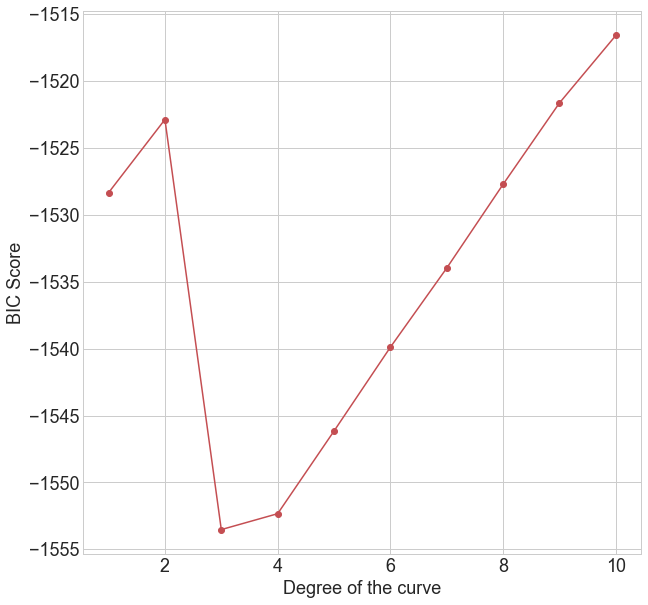

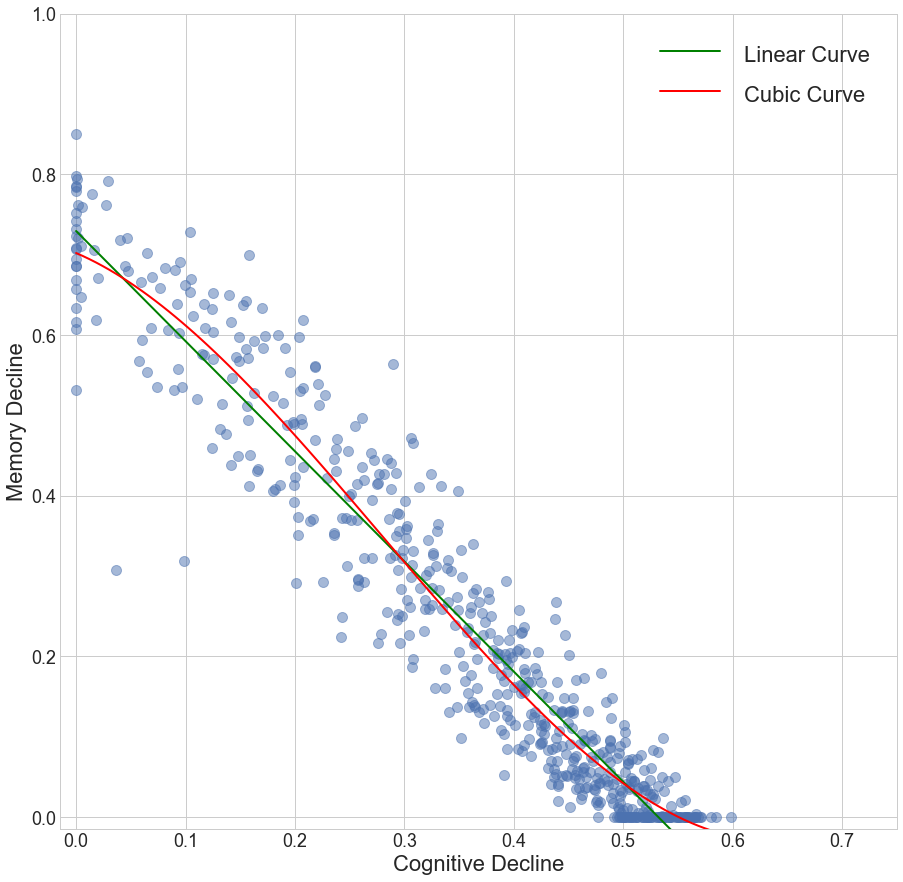

In [25]:
visits = 'm24'
redued_item_24,_ = project_data2(Max_intersection_dataset_item, visits, list_months_to_be_considered)
fit_curve(redued_item_24 ,1,3, 'full_data_')

## Education

In [26]:
def fit_curve_2(redued_item_24, order1 , order2, string):
    mpl.style.use('seaborn-whitegrid')
    result_more = redued_item_24.iloc[-200:,:]
    result_less = redued_item_24.iloc[0:200,:]
    x_m = np.asarray(result_more['NMF_2_1'],dtype=float).reshape(-1, 1)
    y_m = np.asarray( result_more['NMF_2_2'] , dtype=float).reshape(-1, 1)
    x_l = np.asarray(result_less['NMF_2_1'],dtype=float).reshape(-1, 1)
    y_l = np.asarray( result_less['NMF_2_2'] , dtype=float).reshape(-1, 1)    
    data_m = pd.DataFrame(x_m,columns=['x'])
    data_m['y'] = y_m
    data_l = pd.DataFrame(x_l,columns=['x'])
    data_l['y'] = y_l    

    # linear model
    poly_reg = PolynomialFeatures(degree = order1, include_bias= False )
    X_poly = poly_reg.fit_transform(x_m)
    model = sm.ols(formula = 'y ~ X_poly', data = data_m).fit()
    model.conf_int()
    model.pvalues
    print('Results for order{}'.format(order1))
    print('BIC for order {} is {} \n'.format( order1,model.bic) )
    print(model.params)
    print('\n')
    a = model.params
    
    # cubic model
    poly_reg = PolynomialFeatures(degree = order1, include_bias= False )
    X_poly = poly_reg.fit_transform(x_l)
    model = sm.ols(formula = 'y ~ X_poly', data = data_l).fit()
    model.conf_int()
    model.pvalues
    print('Results for order{}'.format(order2))
    print('BIC for order {} is {} \n'.format( order2,model.bic) )
    print(model.params)
    print('\n')
    a3 = model.params
    x_new = np.linspace(min(x_l), max(x_m), 100)
    y_new = 0
    y_new3 = 0
    for i in range(order1+1):
        y_new += a[i]*(x_new**i)
    for j in range(order1+1):
        y_new3 += a3[j]*(x_new**j)
    fig3,ax3 = plt.subplots(figsize=(15, 15))
    ax3.scatter(x_m,y_m, s= 80, alpha = 0.5, c = 'g')
    ax3.scatter(x_l,y_l, s= 80, alpha = 0.5 , c = 'r')
    ax3.plot(x_new, y_new, linewidth = 2.0, color= 'green', label = 'Most Educated')
    ax3.plot(x_new, y_new3, linewidth = 2.0, color= 'red',label = 'Least Educated')
    ax3.set_xlim([-0.05, 1.0])
    ax3.set_ylim([-0.015, 1.0])
    ax3.tick_params(labelsize=18)
    ax3.set_xlabel("Cognitive Decline",fontsize=24)
    ax3.set_ylabel("Memory Decline",fontsize=24)
    ax3.legend()
    ax3.grid(True)
    plt.setp(ax3.get_legend().get_texts(), fontsize='24')
    plt.savefig(address + '\\paper_fig\\' + 'Education_difference_Curve_fitting.png',dpi = 200)

(582, 213)
Results for order1
BIC for order 1 is -520.5598181482923 

Intercept    0.766798
X_poly      -1.429398
dtype: float64


Results for order3
BIC for order 3 is -536.2258137687653 

Intercept    0.728442
X_poly      -1.398471
dtype: float64




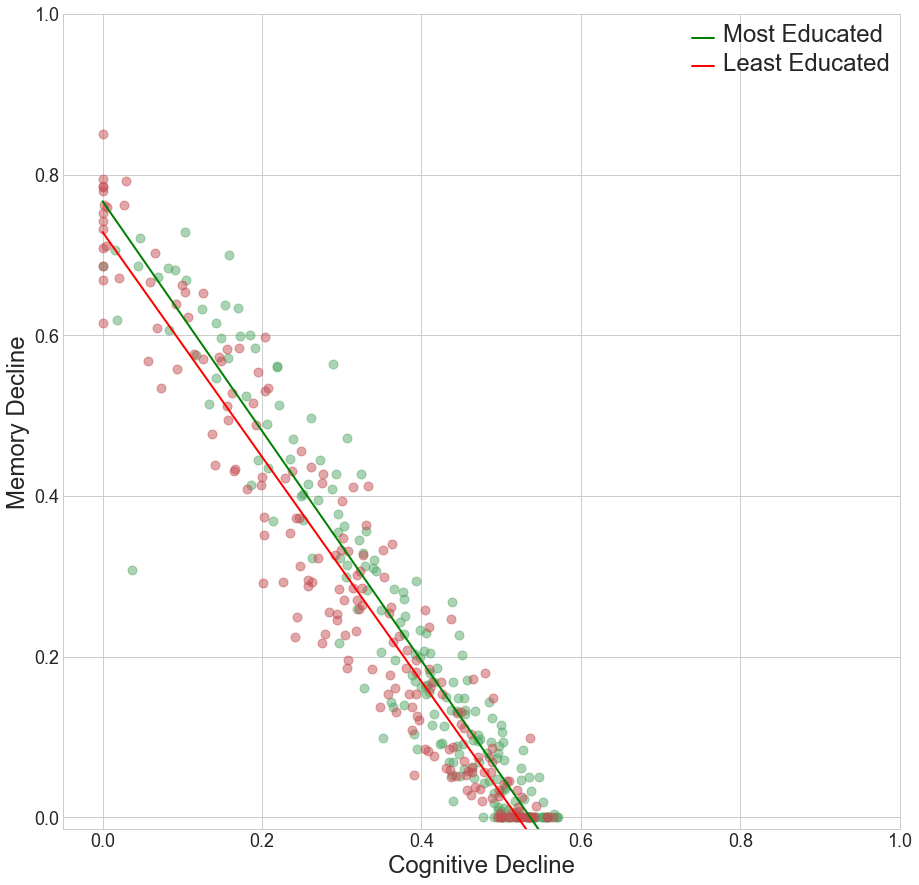

In [27]:
# Full data
redued_item_24, _ = project_data2(Max_intersection_dataset_item, visits, list_months_to_be_considered)
cols['adni_merge'] = ['RID', 'VISCODE','COLPROT','AGE', 'PTGENDER', 'PTEDUCAT', 'PTETHCAT', 'PTRACCAT', 'PTMARRY']
adni_merge = pd.read_csv('ADNI\\Raw_Data\\Demographic_Plots\\ADNIMERGE.csv', usecols=cols['adni_merge'], index_col = ['RID'])
adni_merge = adni_merge.groupby(adni_merge.index).min()
adni_merge_chosen = adni_merge[adni_merge.index.isin(redued_item_24.index)] 
result = pd.concat([adni_merge_chosen, redued_item_24] , axis = 1, ignore_index= False)
slope_edu_less = []
slope_edu_greater = []
result = result.sort_values(by=['PTEDUCAT'])
fit_curve_2(result,1,3,'Education_difference_')

## Ploted features in 2 dimensions using Progression Indicator Vectors

Size of final dataset considered is (582, 213)


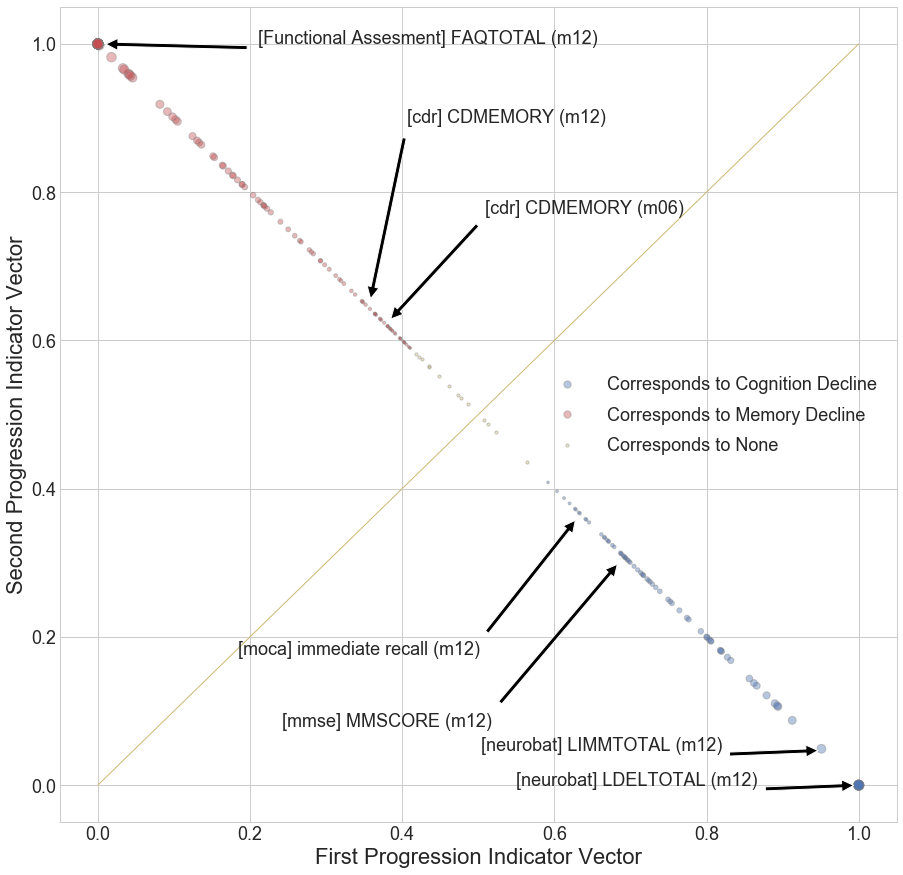

In [28]:
visits = 'm24'
redued_item_24, colors_categories_item_24, M_chosen_item_24,dignosis, M_H_T2, M_H_T3 = project_data(Max_intersection_dataset_item, visits, list_months_to_be_considered)
mpl.style.use('seaborn-whitegrid')
M_H_T2_axis1 = M_H_T2[ M_H_T2['new'] == 'axis 1' ]
M_H_T2_axis2 = M_H_T2[ M_H_T2['new'] == 'axis 2' ]
M_H_T2_amb = M_H_T2[ M_H_T2['new'] == 'ambigious' ]
x_new = np.linspace(0, 1, 100)
y_new = x_new
fig3,ax3 = plt.subplots(figsize=(15, 15))
ax3.scatter(M_H_T2_axis1["axis 1"], M_H_T2_axis1["axis 2"],alpha = 0.4, s= (M_H_T2_axis1['axis 1']**5)*100,linewidth=1.0, cmap="Blues",color= 'b', edgecolors="grey",label='Corresponds to Cognition Decline')
ax3.scatter(M_H_T2_axis2["axis 1"], M_H_T2_axis2["axis 2"],alpha = 0.4, s= (M_H_T2_axis2['axis 2']**5)*100,linewidth=1.0,cmap="Oranges",color= 'r', edgecolors="grey",label='Corresponds to Memory Decline')
ax3.scatter(M_H_T2_amb["axis 1"], M_H_T2_amb["axis 2"],alpha = 0.4,s=10,linewidth=1.0,  edgecolors="grey",color= 'y',label='Corresponds to None')
ax3.plot(x_new, y_new, alpha = 1.0, linewidth = 1.0, color= 'y')
ax3.set_xlim([-0.05, 1.05])
ax3.set_ylim([-0.05, 1.05])
ax3.set_ylabel('Second Progression Indicator Vector',fontsize=22)
ax3.set_xlabel('First Progression Indicator Vector',fontsize=22)
ax3.annotate('[moca] immediate recall (m12)', xy=(0.634160998, 0.365839002), xytext=(0.634160998-0.45, 0.365839002-0.19),arrowprops=dict(facecolor='black', shrink=0.05),fontsize=18)
#ax3.annotate('[moca] moca abstraction (m06)', xy=(0.665256847, 0.334743153), xytext=(0.665256847-0.45, 0.334743153-0.2),arrowprops=dict(facecolor='black', shrink=0.05),fontsize=18)
ax3.annotate('[mmse] MMSCORE (m12)', xy=(0.69147672, 0.30852328), xytext=(0.69147672-0.45, 0.30852328-0.23),arrowprops=dict(facecolor='black', shrink=0.05),fontsize=18)
ax3.annotate('[neurobat] LIMMTOTAL (m12)', xy=(0.95307042, 0.04692958), xytext=(0.95307042-0.45, 0.04692958),arrowprops=dict(facecolor='black', shrink=0.05),fontsize=18)
ax3.annotate('[neurobat] LDELTOTAL (m12)', xy=(1.0, 0.0), xytext=(1.0-0.45, 0.0),arrowprops=dict(facecolor='black', shrink=0.05),fontsize=18)   
ax3.annotate('[cdr] CDMEMORY (m12)', xy=(0.355936585, 0.644063415), xytext=(0.355936585-0.1 + 0.15 , 0.644063415+ 0.25),arrowprops=dict(facecolor='black', shrink=0.05),fontsize=18)
ax3.annotate('[cdr] CDMEMORY (m06)', xy=(0.378390075, 0.621609925), xytext=(0.378390075 + 0.13, 0.621609925+ 0.15),arrowprops=dict(facecolor='black', shrink=0.05),fontsize=18)
#ax3.annotate('[ecogpt] memory (m12)', xy=(0.358086202, 0.641913798), xytext=(0.358086202 + 0.25, 0.641913798+ 0.20),arrowprops=dict(facecolor='black', shrink=0.05),fontsize=18)
ax3.annotate('[Functional Assesment] FAQTOTAL (m12)', xy=(0.0, 1.0), xytext=(0.0+0.21, 1.0),arrowprops=dict(facecolor='black', shrink=0.05),fontsize=18)
ax3 = plt.gca()
# ax3.set_axis_bgcolor((0.898, 0.898, 0.898))
fig3 = plt.gcf()
ax3.tick_params(labelsize=22)
ax3.legend(fontsize = 22)
ax3.grid(True)
plt.setp(ax3.get_legend().get_texts(), fontsize='18')
plt.setp(ax3.get_xticklabels(), fontsize=18)
plt.setp(ax3.get_yticklabels(), fontsize=18)
plt.savefig(address + '\\paper_fig\\'+'xyplot.png',dpi = 200)

## cognition
#moca__moca_immediate_recall___m12_x	0.634160998	0.365839002
#moca__moca_abstraction___m06_x	0.665256847	0.334743153
#mmse__MMSCORE___m12	0.69147672	0.30852328
#neurobat__LIMMTOTAL___m12	0.95307042	0.04692958
#neurobat__LDELTOTAL___m12	1	0
##Memory
#cdr__CDMEMORY___m12	0.355936585	0.644063415
#cdr__CDMEMORY___m06	0.378390075	0.621609925
#ecogpt___memory_m06	0.344416666	0.655583334
#ecogpt___memory_m12	0.358086202	0.641913798
#FAQ__FAQTOTAL___m06	0	1
#FAQ__FAQTOTAL___m12	0	1

## APOE4 in original class

In [29]:
redued = redued_item_24
cols['apoe4'] = ['RID' , 'VISCODE' , 'APOE4'   ]
apoe4 = pd.read_csv("C:\\Users\\Vipul Satone\\health data\\ADNI\\Raw_Data\\Assessment\\apoe4\\ADNIMERGE.csv",index_col='RID', usecols=cols['apoe4'])

apoe4['VISCODE2'] = apoe4['VISCODE']
apoe4['VISCODE'].value_counts()
del apoe4['VISCODE']
apoe4 = apoe4[apoe4['VISCODE2'].isin(['m24']) ]  

redued = redued.merge(apoe4['APOE4'].to_frame(), left_index=True, right_index=True)

print( redued['APOE4'].value_counts(normalize=True) )

#0.0    258
#1.0    155
#2.0     40
#0.0    0.569536
#1.0    0.342163
#2.0    0.088300

print( redued['DXCHANGE'].value_counts(normalize=True) )

#2    197
#1    170
#3     86


print( redued[ redued['DXCHANGE'] == 1 ]['APOE4'].value_counts(normalize=True) )
#0.0    123
#1.0     44
#2.0      3
#2    0.434879
#1    0.375276
#3    0.189845

print( redued[ redued['DXCHANGE'] == 2 ]['APOE4'].value_counts(normalize=True) )
#0.0    112
#1.0     65
#2.0     20
#0.0    0.568528
#1.0    0.329949
#2.0    0.101523

print( redued[ redued['DXCHANGE'] == 3 ]['APOE4'].value_counts(normalize=True) )
#1.0    46
#0.0    23
#2.0    17
#1.0    0.534884
#0.0    0.267442
#2.0    0.197674

# a = redued.groupby(['DXCHANGE'])['APOE4'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('DXCHANGE')
# p = sns.barplot(x="DXCHANGE", y="percentage", hue="APOE4", data=a)

0.0    0.569536
1.0    0.342163
2.0    0.088300
Name: APOE4, dtype: float64
2    0.434879
1    0.375276
3    0.189845
Name: DXCHANGE, dtype: float64
0.0    0.723529
1.0    0.258824
2.0    0.017647
Name: APOE4, dtype: float64
0.0    0.568528
1.0    0.329949
2.0    0.101523
Name: APOE4, dtype: float64
1.0    0.534884
0.0    0.267442
2.0    0.197674
Name: APOE4, dtype: float64


## APOE 4 Dist

Size of final dataset considered is (582, 213)
0    125
1    111
2     47
Name: 0, dtype: int64


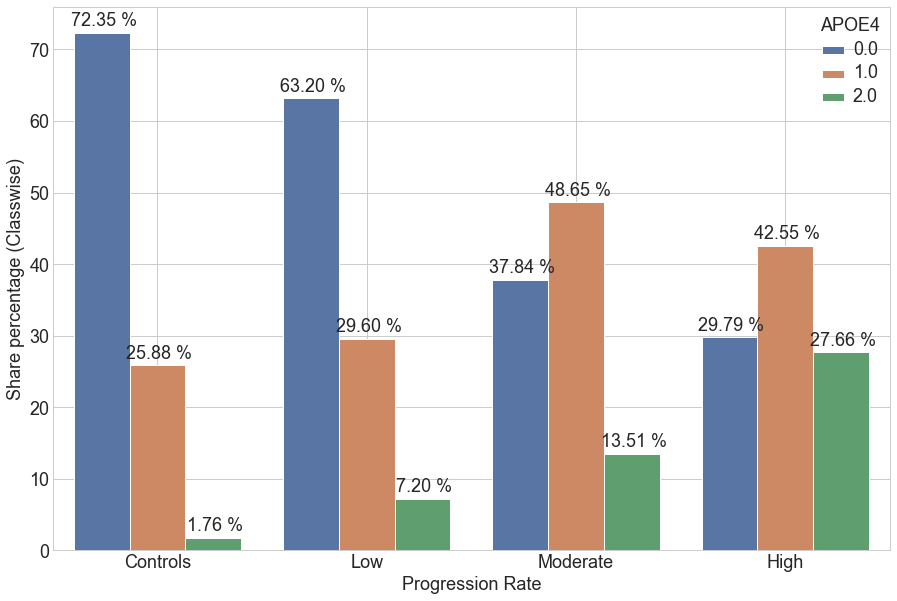

In [30]:
visits = 'm24'
redued_item_24, colors_categories_item_24, M_chosen_item_24,dignosis, M_H_T2, M_H_T3 = project_data(Max_intersection_dataset_item, visits, list_months_to_be_considered)
M_mci_dem = redued_item_24
M_mci_dem_nmf_all = M_mci_dem[['NMF_2_1','NMF_2_2','NMF_3_1', 'NMF_3_2','NMF_3_3']].copy()
M_mci_dem_nmf = M_mci_dem[['NMF_2_1', 'NMF_2_2']]
M_mci_dem_nmf_proj_all = M_mci_dem_nmf_all[~(redued_item_24.DXCHANGE.isin([1]) )] # removing controls
M_mci_dem_nmf_proj_3d_only = M_mci_dem_nmf_proj_all[['NMF_3_1','NMF_3_2','NMF_3_3']]
M_mci_dem_nmf_proj = M_mci_dem_nmf_proj_all[['NMF_2_1','NMF_2_2']]

try:
    colors_categories_item_24_no_controls = redued_item_24[~(redued_item_24.DXCHANGE.isin([1]) )]['DXCHANGE'].replace([1,2,3], ['red', 'blue', 'green'])
except:
    pass

# Function to organize color sequence as per high low and medium
def organize_prediction_moca(M_mci_dem_nmf_proj_3d_only,Predict_gmm):
    M_mci_dem_nmf_proj = M_mci_dem_nmf_proj_3d_only
    M_mci_dem_nmf_proj['predicted'] = Predict_gmm
    a = list(pd.unique(Predict_gmm.iloc[:,0]))
    srt = np.empty((len(a),2))
    for i in a:
        a = M_mci_dem_nmf_proj[M_mci_dem_nmf_proj.predicted == i].iloc[:,1].sum() / len(M_mci_dem_nmf_proj[M_mci_dem_nmf_proj.predicted == i])
        #b =  M_mci_dem_nmf_proj[M_mci_dem_nmf_proj.predicted == i].iloc[:,1].sum() / len(M_mci_dem_nmf_proj[M_mci_dem_nmf_proj.predicted == i])
        #c =  M_mci_dem_nmf_proj[M_mci_dem_nmf_proj.predicted == i].iloc[:,0].sum() / len(M_mci_dem_nmf_proj[M_mci_dem_nmf_proj.predicted == i])
        srt[i,1] = a
        srt[i,0] = i
    srt = pd.DataFrame(srt).sort_values([1])
    Predict_gmm.replace([srt.iloc[0,0],srt.iloc[1,0], srt.iloc[2,0] ],[0,1,2], inplace=True)   
    return pd.DataFrame(Predict_gmm)

model_gmm = mixture.GaussianMixture(n_components=3, covariance_type='diag',  random_state = 0)
model_gmm.fit(M_mci_dem_nmf_proj) # print(gmm.means_)
# label the predicted and only keep HC and PDs
Predict_gmm = pd.DataFrame(model_gmm.predict(M_mci_dem_nmf_proj))
print(Predict_gmm.iloc[:,0].value_counts())
Predict_gmm.columns = ['predicted']
Predict_gmm.index = M_mci_dem_nmf_proj.index
Predict_gmm = organize_prediction_moca(M_mci_dem_nmf_proj,Predict_gmm)
M_mci_dem_nmf_proj['predicted'] = Predict_gmm
#plot_side_by_side_2d(M_mci_dem_nmf_proj,Predict_gmm,redued_item_24,colors_categories_item_24,'item24','gmm')    
nl_data = M_mci_dem_nmf[(redued_item_24.DXCHANGE.isin([1]) )]
data_prediction_labels = pd.concat([nl_data,M_mci_dem_nmf_proj]).fillna(3)

cols['apoe4'] = ['RID' , 'VISCODE' , 'APOE4'   ]
apoe4 = pd.read_csv("C:\\Users\\Vipul Satone\\health data\\ADNI\\Raw_Data\\Assessment\\apoe4\\ADNIMERGE.csv",index_col='RID', usecols=cols['apoe4'])
apoe4['VISCODE2'] = apoe4['VISCODE']
apoe4['VISCODE'].value_counts()
del apoe4['VISCODE']
apoe4 = apoe4[apoe4['VISCODE2'].isin(['m24']) ] 
Predict_gmm = data_prediction_labels
redued = Predict_gmm.merge(apoe4['APOE4'].to_frame(), left_index=True, right_index=True)
redued = redued.merge(redued_item_24['DXCHANGE'].to_frame(), left_index=True, right_index=True)

redued['predicted'] = redued['predicted'].replace([0,1,2,3],['Low','Moderate','High','Controls'])
redued['DXCHANGE'] = redued['DXCHANGE'].replace([1,2,3],['Control','MCI','Dementia'])

mpl.style.use('seaborn-whitegrid')
redued = redued.rename(columns = {'predicted':'Progression Rate'})
plt.figure(figsize=(15, 10)) 
a = redued.groupby(['Progression Rate'])['APOE4'].value_counts(normalize=True).rename('Share percentage (Classwise)').mul(100).reset_index().sort_values('Progression Rate')
axis = sns.barplot(x="Progression Rate", y="Share percentage (Classwise)", hue="APOE4", order = ['Controls','Low','Moderate','High'] ,data=a)
axis.tick_params(labelsize=18)
axis.set_xlabel("Progression Rate",fontsize=18)
axis.set_ylabel("Share percentage (Classwise)",fontsize=18)
axis.grid(True)
plt.setp(axis.get_legend().get_texts(), fontsize='18') # for legend text
plt.setp(axis.get_legend().get_title(), fontsize='18') # for legend title
for p in axis.patches:
    axis.annotate("%.2f" % p.get_height() + ' %', (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', rotation=0, xytext=(2, 12), textcoords='offset points',size=18)
# plt.setp(ax.get_xticklabels(), fontsize=18)    
plt.savefig(address + '\\paper_fig\\'+ 'APOE4_dist_barplot_24.png',dpi = 200)

## Odds Ratio

In [31]:
print( redued['APOE4'].value_counts(normalize=True) )
#0.0    135
#1.0    111
#2.0     37
#0.0    0.477032
#1.0    0.392226
#2.0    0.130742


print( redued['Progression Rate'].value_counts(normalize=True) )
#Medium    143
#High       79
#Low        61
#Medium    0.505300
#High      0.279152
#Low       0.215548

print( redued[ redued['Progression Rate'] == 'Controls' ]['APOE4'].value_counts() )
#0.0    123
#1.0     44
#2.0      3
#0.0    0.723529
#1.0    0.258824
#2.0    0.017647

print( redued[ redued['Progression Rate'] == 'Low' ]['APOE4'].value_counts(normalize=True) )
#0.0    41
#1.0    17
#2.0     3
#0.0    0.672131
#1.0    0.278689
#2.0    0.049180

print( redued[ redued['Progression Rate'] == 'Medium' ]['APOE4'].value_counts(normalize=True) )
#0.0    73
#1.0    55
#2.0    15
#0.0    0.510490
#1.0    0.384615
#2.0    0.104895

print( redued[ redued['Progression Rate'] == 'High' ]['APOE4'].value_counts(normalize=True) )
#1.0    39
#0.0    21
#2.0    19
#1.0    0.493671
#0.0    0.265823
#2.0    0.240506

0.0    0.569536
1.0    0.342163
2.0    0.088300
Name: APOE4, dtype: float64
Controls    0.375276
Low         0.275938
Moderate    0.245033
High        0.103753
Name: Progression Rate, dtype: float64
0.0    123
1.0     44
2.0      3
Name: APOE4, dtype: int64
0.0    0.632
1.0    0.296
2.0    0.072
Name: APOE4, dtype: float64
Series([], Name: APOE4, dtype: float64)
1.0    0.425532
0.0    0.297872
2.0    0.276596
Name: APOE4, dtype: float64


Size of final dataset considered is (582, 213)
0    125
1    111
2     47
Name: 0, dtype: int64
Low         0.629442
Moderate    0.350254
High        0.020305
Name: Progression Rate, dtype: float64
High        43
Moderate    42
Low          1
Name: Progression Rate, dtype: int64


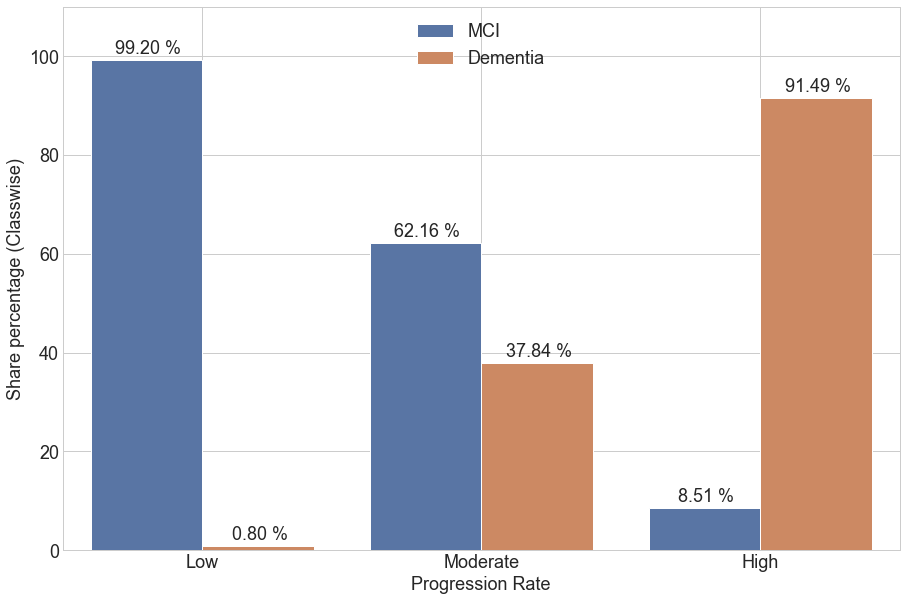

In [32]:
visits = 'm24'
%matplotlib inline
redued_item_24, colors_categories_item_24, M_chosen_item_24,dignosis, M_H_T2, M_H_T3 = project_data(Max_intersection_dataset_item, visits, list_months_to_be_considered)
    
M_mci_dem = redued_item_24
M_mci_dem_nmf_all = M_mci_dem[['NMF_2_1','NMF_2_2','NMF_3_1', 'NMF_3_2','NMF_3_3']].copy()
M_mci_dem_nmf = M_mci_dem[['NMF_2_1', 'NMF_2_2']]
M_mci_dem_nmf_proj_all = M_mci_dem_nmf_all[~(redued_item_24.DXCHANGE.isin([1]) )] # removing controls
M_mci_dem_nmf_proj_3d_only = M_mci_dem_nmf_proj_all[['NMF_3_1','NMF_3_2','NMF_3_3']]
M_mci_dem_nmf_proj = M_mci_dem_nmf_proj_all[['NMF_2_1','NMF_2_2']]

try:
    colors_categories_item_24_no_controls = redued_item_24[~(redued_item_24.DXCHANGE.isin([1]) )]['DXCHANGE'].replace([1,2,3], ['red', 'blue', 'green'])
except:
    pass

def organize_prediction_moca(M_mci_dem_nmf_proj_3d_only,Predict_gmm):
    mpl.style.use('seaborn-whitegrid')
    M_mci_dem_nmf_proj = M_mci_dem_nmf_proj_3d_only
    M_mci_dem_nmf_proj['predicted'] = Predict_gmm
    a = list(pd.unique(Predict_gmm.iloc[:,0]))
    srt = np.empty((len(a),2))
    for i in a:
        a = M_mci_dem_nmf_proj[M_mci_dem_nmf_proj.predicted == i].iloc[:,1].sum() / len(M_mci_dem_nmf_proj[M_mci_dem_nmf_proj.predicted == i])
        #b =  M_mci_dem_nmf_proj[M_mci_dem_nmf_proj.predicted == i].iloc[:,1].sum() / len(M_mci_dem_nmf_proj[M_mci_dem_nmf_proj.predicted == i])
        #c =  M_mci_dem_nmf_proj[M_mci_dem_nmf_proj.predicted == i].iloc[:,0].sum() / len(M_mci_dem_nmf_proj[M_mci_dem_nmf_proj.predicted == i])
        srt[i,1] = a
        srt[i,0] = i
    srt = pd.DataFrame(srt).sort_values([1])
    Predict_gmm.replace([srt.iloc[0,0],srt.iloc[1,0], srt.iloc[2,0] ],[0,1,2], inplace=True)   
    return pd.DataFrame(Predict_gmm)

model_gmm = mixture.GaussianMixture(n_components=3, covariance_type='diag',  random_state = 0)
model_gmm.fit(M_mci_dem_nmf_proj) # print(gmm.means_)
# label the predicted and only keep HC and PDs
Predict_gmm = pd.DataFrame(model_gmm.predict(M_mci_dem_nmf_proj))
print(Predict_gmm.iloc[:,0].value_counts())
Predict_gmm.columns = ['predicted']
Predict_gmm.index = M_mci_dem_nmf_proj.index
Predict_gmm = organize_prediction_moca(M_mci_dem_nmf_proj,Predict_gmm)
M_mci_dem_nmf_proj['predicted'] = Predict_gmm

nl_data = M_mci_dem_nmf[(redued_item_24.DXCHANGE.isin([1]) )]
data_prediction_labels = pd.concat([nl_data,M_mci_dem_nmf_proj]).fillna(3)

cols['apoe4'] = ['RID' , 'VISCODE' , 'APOE4'   ]
apoe4 = pd.read_csv("C:\\Users\\Vipul Satone\\health data\\ADNI\\Raw_Data\\Assessment\\apoe4\\ADNIMERGE.csv",index_col='RID', usecols=cols['apoe4'])
apoe4['VISCODE2'] = apoe4['VISCODE']
apoe4['VISCODE'].value_counts()
del apoe4['VISCODE']
apoe4 = apoe4[apoe4['VISCODE2'].isin(['m24']) ] 
Predict_gmm = data_prediction_labels
redued = Predict_gmm.merge(apoe4['APOE4'].to_frame(), left_index=True, right_index=True)
redued = redued.merge(redued_item_24['DXCHANGE'].to_frame(), left_index=True, right_index=True)
redued['predicted'] = redued['predicted'].replace([0,1,2,3],['Low','Moderate','High','Controls'])
redued['DXCHANGE'] = redued['DXCHANGE'].replace([1,2,3],['Controls','MCI','Dementia'])
redued = redued.rename(columns = {'predicted':'Progression Rate'})

plt.figure(figsize=(15, 10)) 
a = redued.groupby(['Progression Rate'])['DXCHANGE'].value_counts(normalize=True).rename('percentage (Classwise)').mul(100).reset_index().sort_values('DXCHANGE')
axis = sns.barplot(x="Progression Rate", y="percentage (Classwise)", hue="DXCHANGE", hue_order = ['MCI','Dementia']  , order = ['Low','Moderate','High'] ,data=a)
axis.tick_params(labelsize=18)
axis.set_xlabel("Progression Rate",fontsize=18)
axis.set_ylabel("Share percentage (Classwise)",fontsize=18)
axis.set_ylim( ([0,110]) )
axis.legend( fontsize = 18,loc='upper center')
axis.grid(True)
plt.setp(axis.get_legend().get_texts(), fontsize='18') # for legend text
plt.setp(axis.get_legend().get_title(), fontsize='18') # for legend title
for p in axis.patches:
    axis.annotate("%.2f" % p.get_height() + ' %', (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', rotation=0, xytext=(2, 12), textcoords='offset points',size=18)
plt.setp(axis.get_xticklabels(), fontsize=18)
plt.savefig(address + '\\paper_fig\\' + 'oddsratio_dist_barplot_24.png',dpi = 200)

a = redued.groupby(['Progression Rate'])['DXCHANGE'].value_counts().rename('Count').reset_index().sort_values('Progression Rate')

print( redued[ redued['DXCHANGE'] == 'MCI' ]['Progression Rate'].value_counts(normalize=True) )
# Medium    0.604061
# Low       0.309645
# High      0.086294
# Medium    119
# Low        61
# High       17

print( redued[ redued['DXCHANGE'] == 'Dementia' ]['Progression Rate'].value_counts() )
# High      0.72093
# Medium    0.27907
# High      62
# Medium    24

## MMSE and GD Scale and FAQ

Size of final dataset considered is (582, 213)
(582, 213)
0    125
1    111
2     47
Name: 0, dtype: int64


<Figure size 1080x720 with 0 Axes>

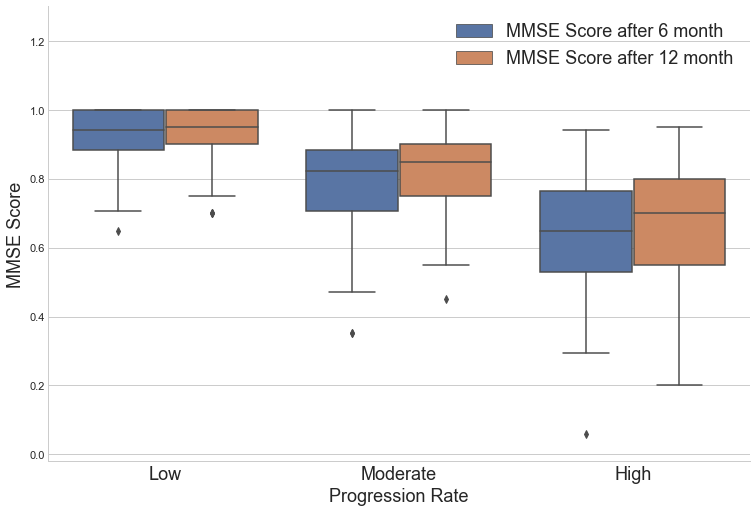

<Figure size 1080x720 with 0 Axes>

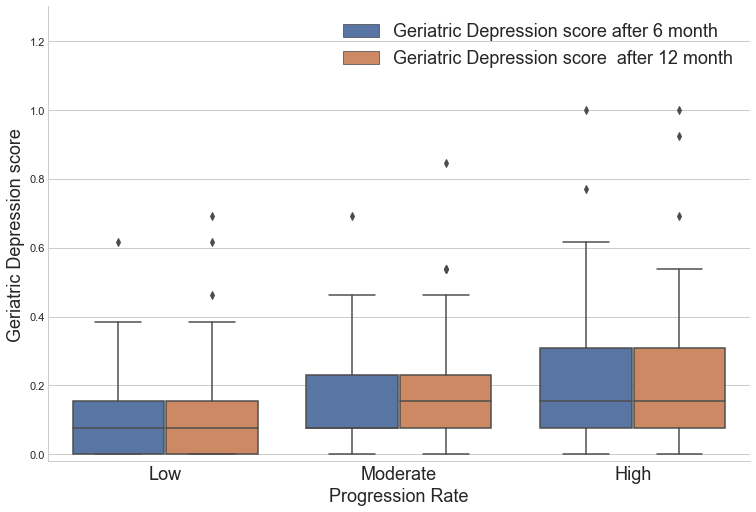

<Figure size 1080x720 with 0 Axes>

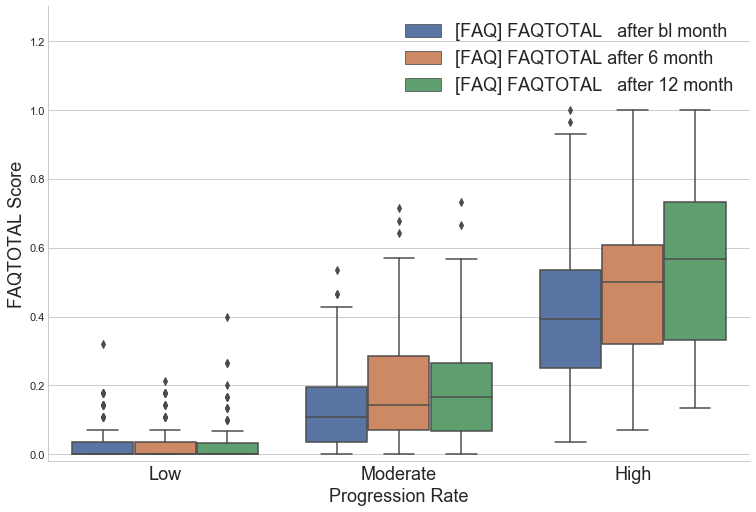

In [33]:
visits = 'm24'
redued_item_24, colors_categories_item_24, M_chosen_item_24,dignosis, M_H_T2, M_H_T3 = project_data(Max_intersection_dataset_item, visits, list_months_to_be_considered)
_, M_chosen = project_data2(Max_intersection_dataset_item, visits, list_months_to_be_considered)
    
M_mci_dem = redued_item_24
M_mci_dem_nmf_all = M_mci_dem[['NMF_2_1','NMF_2_2','NMF_3_1', 'NMF_3_2','NMF_3_3']].copy()
M_mci_dem_nmf = M_mci_dem[['NMF_2_1', 'NMF_2_2']]
M_mci_dem_nmf_proj_all = M_mci_dem_nmf_all[~(redued_item_24.DXCHANGE.isin([1]) )] # removing controls
M_mci_dem_nmf_proj_3d_only = M_mci_dem_nmf_proj_all[['NMF_3_1','NMF_3_2','NMF_3_3']]
M_mci_dem_nmf_proj = M_mci_dem_nmf_proj_all[['NMF_2_1','NMF_2_2']]

try:
    colors_categories_item_24_no_controls = redued_item_24[~(redued_item_24.DXCHANGE.isin([1]) )]['DXCHANGE'].replace([1,2,3], ['red', 'blue', 'green'])
except:
    pass

def organize_prediction_moca(M_mci_dem_nmf_proj_3d_only,Predict_gmm):
    mpl.style.use('seaborn-whitegrid')
    M_mci_dem_nmf_proj = M_mci_dem_nmf_proj_3d_only
    M_mci_dem_nmf_proj['predicted'] = Predict_gmm
    a = list(pd.unique(Predict_gmm.iloc[:,0]))
    srt = np.empty((len(a),2))
    for i in a:
        a = M_mci_dem_nmf_proj[M_mci_dem_nmf_proj.predicted == i].iloc[:,1].sum() / len(M_mci_dem_nmf_proj[M_mci_dem_nmf_proj.predicted == i])
        #b =  M_mci_dem_nmf_proj[M_mci_dem_nmf_proj.predicted == i].iloc[:,1].sum() / len(M_mci_dem_nmf_proj[M_mci_dem_nmf_proj.predicted == i])
        #c =  M_mci_dem_nmf_proj[M_mci_dem_nmf_proj.predicted == i].iloc[:,0].sum() / len(M_mci_dem_nmf_proj[M_mci_dem_nmf_proj.predicted == i])
        srt[i,1] = a
        srt[i,0] = i
    srt = pd.DataFrame(srt).sort_values([1])
    Predict_gmm.replace([srt.iloc[0,0],srt.iloc[1,0], srt.iloc[2,0] ],[0,1,2], inplace=True)   
    return pd.DataFrame(Predict_gmm)

model_gmm = mixture.GaussianMixture(n_components=3, covariance_type='diag',  random_state = 0)
model_gmm.fit(M_mci_dem_nmf_proj) # print(gmm.means_)
# label the predicted and only keep HC and PDs
Predict_gmm = pd.DataFrame(model_gmm.predict(M_mci_dem_nmf_proj))
print(Predict_gmm.iloc[:,0].value_counts())
Predict_gmm.columns = ['predicted']
Predict_gmm.index = M_mci_dem_nmf_proj.index
Predict_gmm = organize_prediction_moca(M_mci_dem_nmf_proj,Predict_gmm)
M_mci_dem_nmf_proj['predicted'] = Predict_gmm
#plot_side_by_side_2d(M_mci_dem_nmf_proj,Predict_gmm,redued_item_24,colors_categories_item_24,'item24','gmm')    
nl_data = M_mci_dem_nmf[(redued_item_24.DXCHANGE.isin([1]) )]
data_prediction_labels = pd.concat([nl_data,M_mci_dem_nmf_proj]).fillna(3)

cols['apoe4'] = ['RID' , 'VISCODE' , 'APOE4'   ]
apoe4 = pd.read_csv("C:\\Users\\Vipul Satone\\health data\\ADNI\\Raw_Data\\Assessment\\apoe4\\ADNIMERGE.csv",index_col='RID', usecols=cols['apoe4'])
apoe4['VISCODE2'] = apoe4['VISCODE']
apoe4['VISCODE'].value_counts()
del apoe4['VISCODE']
apoe4 = apoe4[apoe4['VISCODE2'].isin(['m24']) ] 
Predict_gmm = data_prediction_labels
redued = Predict_gmm.merge(apoe4['APOE4'].to_frame(), left_index=True, right_index=True)
redued = redued.merge(redued_item_24['DXCHANGE'].to_frame(), left_index=True, right_index=True)
redued = redued.merge(M_chosen[['FAQ__FAQTOTAL__m06','FAQ__FAQTOTAL__bl','FAQ__FAQTOTAL__m12', 'mmse__MMSCORE__m06','mmse__MMSCORE__m12','gd_scale__GDTOTAL__m06','gd_scale__GDTOTAL__m12']], left_index=True, right_index=True)

redued['predicted'] = redued['predicted'].replace([0,1,2,3],['Low','Moderate','High','Controls'])
redued['DXCHANGE'] = redued['DXCHANGE'].replace([1,2,3],['Controls','MCI','Dementia'])

redued_2 = redued[['mmse__MMSCORE__m06','predicted']]
redued_2['Progression Vector'] = 'MMSE Score after 6 month'
redued_2.columns = ['val','predicted','Progression Vector']
redued_1 = redued[['mmse__MMSCORE__m12','predicted']]
redued_1['Progression Vector'] = 'MMSE Score after 12 month'
redued_1.columns = ['val','predicted','Progression Vector']
redued_new = pd.concat([redued_1,redued_2])

plt.figure(figsize=(15, 10)) 
axis = sns.factorplot("predicted", hue="Progression Vector", y="val", hue_order = ['MMSE Score after 6 month','MMSE Score after 12 month' ],  order =  ['Low','Moderate','High'],data=redued_new,size =7, aspect = 1.5, kind="box",legend_out=False)
for ax in axis.axes.flat:
    ax.set_xlabel("Progression Rate",fontsize=18)
    ax.set_ylabel("MMSE Score",fontsize=18)
    ax.set_ylim( ([-0.02,1.3])  )
    ax.legend( fontsize = 18)
plt.setp(ax.get_xticklabels(), fontsize=18)
plt.savefig(address + '\\paper_fig\\' +  'ppmi_type_mmse_24.png',dpi = 200)    
    
redued_2 = redued[['gd_scale__GDTOTAL__m06','predicted']]
redued_2['Progression Vector'] = 'Geriatric Depression score after 6 month'
redued_2.columns = ['val','predicted','Progression Vector']
redued_1 = redued[['gd_scale__GDTOTAL__m12','predicted']]
redued_1['Progression Vector'] = 'Geriatric Depression score  after 12 month'
redued_1.columns = ['val','predicted','Progression Vector']
redued_new = pd.concat([redued_1,redued_2])

plt.figure(figsize=(15, 10)) 
axis = sns.factorplot("predicted", hue="Progression Vector", y="val",hue_order = ['Geriatric Depression score after 6 month','Geriatric Depression score  after 12 month'], order =  ['Low','Moderate','High'],data=redued_new,size =7, aspect = 1.5, kind="box",legend_out=False)
for ax in axis.axes.flat:
    ax.set_xlabel("Progression Rate",fontsize=18)
    ax.set_ylabel("Geriatric Depression score",fontsize=18)
    ax.set_ylim( ([-0.02,1.3])  )
    ax.legend( fontsize = 18)
plt.setp(ax.get_xticklabels(), fontsize=18)
plt.savefig(address + 'ppmi_type_gd_24.png',dpi = 200)  
    
redued_2 = redued[['FAQ__FAQTOTAL__m06','predicted']]
redued_2['Progression Vector'] = '[FAQ] FAQTOTAL after 6 month'
redued_2.columns = ['val','predicted','Progression Vector']
redued_1 = redued[['FAQ__FAQTOTAL__m12','predicted']]
redued_1['Progression Vector'] = '[FAQ] FAQTOTAL   after 12 month'
redued_1.columns = ['val','predicted','Progression Vector']
redued_3 = redued[['FAQ__FAQTOTAL__bl','predicted']]
redued_3['Progression Vector'] = '[FAQ] FAQTOTAL   after bl month'
redued_3.columns = ['val','predicted','Progression Vector']
redued_new = pd.concat([redued_1,redued_2,redued_3])

plt.figure(figsize=(15, 10)) 
axis = sns.factorplot("predicted", hue="Progression Vector", y="val", hue_order =  ['[FAQ] FAQTOTAL   after bl month','[FAQ] FAQTOTAL after 6 month','[FAQ] FAQTOTAL   after 12 month'], order =  ['Low','Moderate','High'],data=redued_new,size =7, aspect = 1.5, kind="box",legend_out=False)
for ax in axis.axes.flat:
    ax.set_xlabel("Progression Rate",fontsize=18)
    ax.set_ylabel("FAQTOTAL Score",fontsize=18)
    ax.set_ylim( ([-0.02,1.3])  )
    ax.legend( fontsize = 18)
plt.setp(ax.get_xticklabels(), fontsize=18)
plt.savefig(address + '\\paper_fig\\' +  'ppmi_type_faq_24.png',dpi = 200)

## Normalised progression scale

Size of final dataset considered is (582, 213)
0    125
1    111
2     47
Name: 0, dtype: int64


<Figure size 1080x720 with 0 Axes>

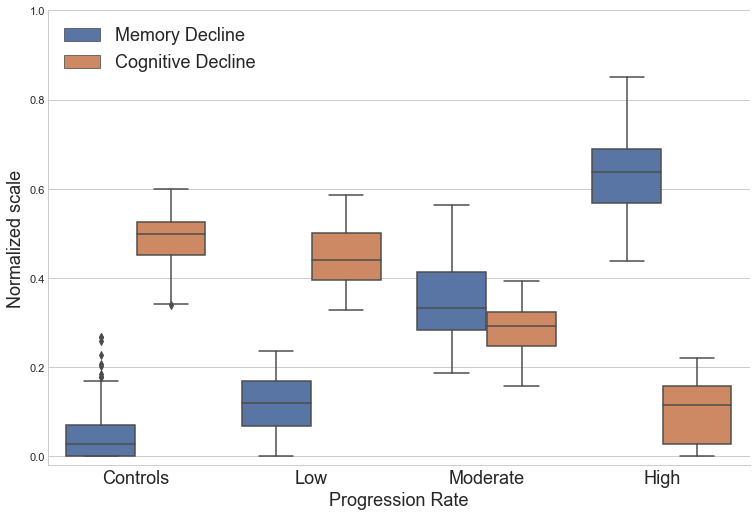

In [34]:

visits = 'm24'
%matplotlib inline
redued_item_24, colors_categories_item_24, M_chosen_item_24,dignosis, M_H_T2, M_H_T3 = project_data(Max_intersection_dataset_item, visits, list_months_to_be_considered)
    
    
M_mci_dem = redued_item_24
M_mci_dem_nmf_all = M_mci_dem[['NMF_2_1','NMF_2_2','NMF_3_1', 'NMF_3_2','NMF_3_3']].copy()
M_mci_dem_nmf = M_mci_dem[['NMF_2_1', 'NMF_2_2']]
M_mci_dem_nmf_proj_all = M_mci_dem_nmf_all[~(redued_item_24.DXCHANGE.isin([1]) )] # removing controls
M_mci_dem_nmf_proj_3d_only = M_mci_dem_nmf_proj_all[['NMF_3_1','NMF_3_2','NMF_3_3']]
M_mci_dem_nmf_proj = M_mci_dem_nmf_proj_all[['NMF_2_1','NMF_2_2']]

try:
    colors_categories_item_24_no_controls = redued_item_24[~(redued_item_24.DXCHANGE.isin([1]) )]['DXCHANGE'].replace([1,2,3], ['red', 'blue', 'green'])
except:
    pass

def organize_prediction_moca(M_mci_dem_nmf_proj_3d_only,Predict_gmm):
    mpl.style.use('seaborn-whitegrid')
    M_mci_dem_nmf_proj = M_mci_dem_nmf_proj_3d_only
    M_mci_dem_nmf_proj['predicted'] = Predict_gmm
    a = list(pd.unique(Predict_gmm.iloc[:,0]))
    srt = np.empty((len(a),2))
    for i in a:
        a = M_mci_dem_nmf_proj[M_mci_dem_nmf_proj.predicted == i].iloc[:,1].sum() / len(M_mci_dem_nmf_proj[M_mci_dem_nmf_proj.predicted == i])
        #b =  M_mci_dem_nmf_proj[M_mci_dem_nmf_proj.predicted == i].iloc[:,1].sum() / len(M_mci_dem_nmf_proj[M_mci_dem_nmf_proj.predicted == i])
        #c =  M_mci_dem_nmf_proj[M_mci_dem_nmf_proj.predicted == i].iloc[:,0].sum() / len(M_mci_dem_nmf_proj[M_mci_dem_nmf_proj.predicted == i])
        srt[i,1] = a
        srt[i,0] = i
    srt = pd.DataFrame(srt).sort_values([1])
    Predict_gmm.replace([srt.iloc[0,0],srt.iloc[1,0], srt.iloc[2,0] ],[0,1,2], inplace=True)   
    return pd.DataFrame(Predict_gmm)

model_gmm = mixture.GaussianMixture(n_components=3, covariance_type='diag',  random_state = 0)
model_gmm.fit(M_mci_dem_nmf_proj) # print(gmm.means_)
# label the predicted and only keep HC and PDs
Predict_gmm = pd.DataFrame(model_gmm.predict(M_mci_dem_nmf_proj))
print(Predict_gmm.iloc[:,0].value_counts())
Predict_gmm.columns = ['predicted']
Predict_gmm.index = M_mci_dem_nmf_proj.index
Predict_gmm = organize_prediction_moca(M_mci_dem_nmf_proj,Predict_gmm)
M_mci_dem_nmf_proj['predicted'] = Predict_gmm
#plot_side_by_side_2d(M_mci_dem_nmf_proj,Predict_gmm,redued_item_24,colors_categories_item_24,'item24','gmm')    
nl_data = M_mci_dem_nmf[(redued_item_24.DXCHANGE.isin([1]) )]
data_prediction_labels = pd.concat([nl_data,M_mci_dem_nmf_proj]).fillna(3)

cols['apoe4'] = ['RID' , 'VISCODE' , 'APOE4'   ]
apoe4 = pd.read_csv("C:\\Users\\Vipul Satone\\health data\\ADNI\\Raw_Data\\Assessment\\apoe4\\ADNIMERGE.csv",index_col='RID', usecols=cols['apoe4'])
apoe4['VISCODE2'] = apoe4['VISCODE']
apoe4['VISCODE'].value_counts()
del apoe4['VISCODE']
apoe4 = apoe4[apoe4['VISCODE2'].isin(['m24']) ] 
Predict_gmm = data_prediction_labels
redued = Predict_gmm.merge(apoe4['APOE4'].to_frame(), left_index=True, right_index=True)
redued = redued.merge(redued_item_24['DXCHANGE'].to_frame(), left_index=True, right_index=True)

redued['predicted'] = redued['predicted'].replace([0,1,2,3],['Low','Moderate','High','Controls'])
redued['DXCHANGE'] = redued['DXCHANGE'].replace([1,2,3],['Controls','MCI','Dementia'])

redued_2 = redued[['NMF_2_1','predicted']]
redued_2['Progression Vector'] = 'Cognitive Decline'
redued_2.columns = ['val','predicted','Progression Vector']
redued_1 = redued[['NMF_2_2','predicted']]
redued_1['Progression Vector'] = 'Memory Decline'
redued_1.columns = ['val','predicted','Progression Vector']
redued_new = pd.concat([redued_1,redued_2])

plt.figure(figsize=(15, 10)) 
axis = sns.factorplot("predicted", hue="Progression Vector", y="val", order =  ['Controls', 'Low','Moderate','High'], data=redued_new,size =7, aspect = 1.5, kind="box",legend_out=False)
for ax in axis.axes.flat:
    ax.set_xlabel("Progression Rate",fontsize=18)
    ax.set_ylabel("Normalized scale",fontsize=18)
    ax.set_ylim( ([-0.02,1])   )
    ax.legend( fontsize = 18)
plt.setp(ax.get_xticklabels(), fontsize=18)
plt.savefig(address + '\\paper_fig\\' + 'normalized_axis_vs_prog_vectors_24.png',dpi = 200)